In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.2/235.7 GB disk)


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: creat yaml file

%%writefile data.yaml

    train: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/train/images
    val: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/valid/images
    test: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/test/images
    nc: 2
    names : ['ASD', 'TD']

Writing data.yaml


In [ ]:
from ultralytics import YOLO

# Build a YOLOv6n model from scratch
model = YOLO("yolo11l.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 120 epochs
results = model.train(data= "data.yaml", epochs=50, imgsz=640)

100%|██████████| 49.0M/49.0M [00:00<00:00, 191MB/s]


YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  2   1455616  ultralytics.nn.modules.block.C2PSA           [512, 512, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024, 512, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  2    756736  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 2.9±5.4 ms, read: 0.0±0.0 MB/s, size: 10.9 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/train/labels.cache... 4917 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4917/4917 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 0.1±0.0 MB/s, size: 12.6 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/valid/labels.cache... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.2G     0.7156      1.102      1.131         13        640: 100%|██████████| 308/308 [01:56<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:45<00:00,  1.04s/it]

                   all       1405       1405      0.429      0.999      0.509      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.7G     0.6998     0.9461      1.104         16        640: 100%|██████████| 308/308 [01:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.95it/s]

                   all       1405       1405       0.49          1      0.536      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.7G     0.6393     0.9076      1.061         14        640: 100%|██████████| 308/308 [01:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.91it/s]

                   all       1405       1405      0.497          1      0.551       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.7G     0.6077     0.8816       1.04         13        640: 100%|██████████| 308/308 [01:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.98it/s]

                   all       1405       1405      0.481      0.978      0.519      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.7G     0.5852     0.8709      1.029         17        640: 100%|██████████| 308/308 [01:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.01it/s]

                   all       1405       1405        0.5          1      0.523      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.8G     0.5678     0.8653      1.022         12        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.99it/s]

                   all       1405       1405        0.5          1      0.585      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.8G     0.5513     0.8518      1.011         13        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405      0.507      0.987       0.62      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.8G      0.534     0.8353      1.001         16        640: 100%|██████████| 308/308 [01:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.82it/s]

                   all       1405       1405      0.524      0.966      0.713      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.8G     0.5326     0.8241      1.002         12        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.25it/s]

                   all       1405       1405      0.522      0.964      0.721      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.8G     0.5357     0.8151     0.9997         10        640: 100%|██████████| 308/308 [00:59<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.01it/s]

                   all       1405       1405      0.576      0.906      0.745      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.8G     0.5285     0.8107      1.001         14        640: 100%|██████████| 308/308 [01:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.88it/s]

                   all       1405       1405      0.519      0.919      0.729      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.8G     0.5136     0.7911     0.9919         18        640: 100%|██████████| 308/308 [00:59<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.26it/s]

                   all       1405       1405      0.597      0.886       0.78       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.8G     0.5079     0.7825     0.9851         13        640: 100%|██████████| 308/308 [01:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.05it/s]

                   all       1405       1405      0.581      0.921      0.775      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.8G     0.5069     0.7718     0.9906         12        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.11it/s]

                   all       1405       1405        0.6      0.897      0.794       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.8G     0.5064     0.7576     0.9892         15        640: 100%|██████████| 308/308 [01:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.97it/s]

                   all       1405       1405      0.654      0.893      0.843      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.8G     0.4979     0.7455     0.9823         16        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.13it/s]

                   all       1405       1405      0.647      0.893      0.829      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.8G     0.5035     0.7291     0.9859         12        640: 100%|██████████| 308/308 [00:59<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.14it/s]

                   all       1405       1405      0.711      0.837      0.857      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.8G      0.489     0.7211     0.9777         15        640: 100%|██████████| 308/308 [00:59<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.16it/s]

                   all       1405       1405      0.678      0.886      0.842      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.8G     0.4935     0.7173     0.9824         10        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.751      0.846      0.865      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.8G     0.4856     0.7037     0.9762         18        640: 100%|██████████| 308/308 [00:59<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.92it/s]

                   all       1405       1405      0.743      0.879      0.891      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.8G     0.4809     0.6771     0.9738         16        640: 100%|██████████| 308/308 [00:59<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.02it/s]

                   all       1405       1405      0.749      0.846      0.877      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.8G      0.479     0.6833      0.976         12        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405      0.752      0.829      0.876      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.8G     0.4775     0.6659     0.9721         11        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.11it/s]

                   all       1405       1405      0.733      0.918      0.934      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.8G     0.4785     0.6507     0.9717         16        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.99it/s]

                   all       1405       1405      0.807      0.881      0.919      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.8G      0.472     0.6297      0.973         10        640: 100%|██████████| 308/308 [00:59<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.89it/s]

                   all       1405       1405      0.695       0.93      0.939      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.8G     0.4638     0.6191     0.9619          9        640: 100%|██████████| 308/308 [01:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.02it/s]

                   all       1405       1405      0.761      0.876      0.925      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.8G     0.4702     0.6054     0.9731         11        640: 100%|██████████| 308/308 [00:59<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405      0.839      0.905      0.948      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.8G     0.4707     0.6005     0.9701         12        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.16it/s]

                   all       1405       1405      0.823      0.863      0.919       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.8G     0.4644     0.5844     0.9639         10        640: 100%|██████████| 308/308 [00:59<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.24it/s]

                   all       1405       1405      0.795       0.93      0.957      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.8G     0.4668     0.5725     0.9659         12        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.94it/s]

                   all       1405       1405      0.718      0.937      0.961      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.9G     0.4641     0.5686     0.9665         14        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.87it/s]

                   all       1405       1405      0.808      0.947      0.972      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.9G     0.4569     0.5482      0.964         10        640: 100%|██████████| 308/308 [00:59<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.14it/s]

                   all       1405       1405      0.917      0.922      0.977      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.9G     0.4468     0.5306      0.957          9        640: 100%|██████████| 308/308 [00:59<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.74it/s]

                   all       1405       1405      0.852      0.906      0.973      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.9G     0.4507     0.5195      0.958         10        640: 100%|██████████| 308/308 [00:59<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.21it/s]

                   all       1405       1405      0.948      0.956      0.985      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.9G     0.4479        0.5     0.9579         12        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.76it/s]

                   all       1405       1405      0.915      0.905      0.976      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.9G     0.4438     0.4889     0.9558         16        640: 100%|██████████| 308/308 [00:59<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.27it/s]

                   all       1405       1405       0.93      0.942      0.983      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.9G     0.4468     0.4941     0.9566         18        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.31it/s]

                   all       1405       1405      0.941      0.966      0.989      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.9G     0.4422     0.4667     0.9549         17        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all       1405       1405      0.953      0.962      0.989      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.9G     0.4401     0.4598      0.956         12        640: 100%|██████████| 308/308 [01:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.20it/s]

                   all       1405       1405      0.947      0.953      0.987      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.9G     0.4322     0.4404     0.9479         17        640: 100%|██████████| 308/308 [01:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.00it/s]

                   all       1405       1405      0.952      0.959       0.99      0.917


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.9G     0.4083     0.3878     0.9586          5        640: 100%|██████████| 308/308 [01:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.08it/s]

                   all       1405       1405      0.956      0.971       0.99      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.9G     0.4015       0.35      0.946          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all       1405       1405      0.947       0.97       0.99      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.9G     0.4024     0.3471     0.9503          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405      0.932       0.94      0.989      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.9G     0.3966     0.3305     0.9446          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405       0.95      0.971      0.993      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.9G     0.3921     0.2974     0.9417          5        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.90it/s]

                   all       1405       1405      0.972      0.972      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.9G     0.3877     0.2824      0.944          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.21it/s]

                   all       1405       1405      0.982      0.977      0.993      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.9G     0.3824     0.2671     0.9339          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.87it/s]

                   all       1405       1405      0.982      0.988      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.9G     0.3806     0.2457     0.9328          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405       0.99      0.992      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.9G     0.3767     0.2331     0.9284          5        640: 100%|██████████| 308/308 [01:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.92it/s]

                   all       1405       1405      0.983      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.9G     0.3731     0.2138     0.9287          5        640: 100%|██████████| 308/308 [00:59<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.11it/s]

                   all       1405       1405      0.991      0.982      0.994      0.932



50 epochs completed in 0.964 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]


                   all       1405       1405      0.984      0.989      0.994      0.932
                   ASD        704        704      0.974      0.997      0.992      0.926
                    TD        701        701      0.994       0.98      0.995      0.938
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!cp -r runs/detect/train /content/drive/MyDrive/sMRI2_yolov11_training_results/

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:

# ROI Extraction Functions
def extract_roi_from_yolo_results(results, original_image, save_path=None):
    """
    Extract ROI from YOLO detection results

    Args:
        results: YOLO detection results
        original_image: Original image (numpy array or PIL Image)
        save_path: Path to save ROI images (optional)

    Returns:
        List of dictionaries containing ROI information
    """
    rois = []

    # Convert PIL to numpy if needed
    if isinstance(original_image, Image.Image):
        original_image = np.array(original_image)

    # Process each detection
    for i, detection in enumerate(results.boxes):
        # Get bounding box coordinates
        x1, y1, x2, y2 = detection.xyxy[0].cpu().numpy().astype(int)
        confidence = detection.conf[0].cpu().numpy()
        class_id = int(detection.cls[0].cpu().numpy())
        class_name = results.names[class_id]

        # Extract ROI
        roi = original_image[y1:y2, x1:x2]

        roi_info = {
            'roi': roi,
            'confidence': confidence,
            'class_id': class_id,
            'class_name': class_name,
            'bbox': [x1, y1, x2, y2],
            'area': (x2-x1) * (y2-y1)
        }

        rois.append(roi_info)

        # Save ROI if path provided
        if save_path and len(roi) > 0:
            roi_filename = f"{save_path}/roi_{i}_{class_name}_{confidence:.2f}.jpg"
            cv2.imwrite(roi_filename, cv2.cvtColor(roi, cv2.COLOR_RGB2BGR))

    return rois

In [ ]:
def visualize_rois(rois, max_display=6):
    """
    Visualize extracted ROIs

    Args:
        rois: List of ROI dictionaries
        max_display: Maximum number of ROIs to display
    """
    n_rois = min(len(rois), max_display)

    if n_rois == 0:
        print("No ROIs to display")
        return

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(n_rois):
        roi_info = rois[i]
        axes[i].imshow(roi_info['roi'])
        axes[i].set_title(f"{roi_info['class_name']}\nConf: {roi_info['confidence']:.2f}")
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(n_rois, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:

def analyze_roi_features(rois):
    """
    Analyze extracted ROI features

    Args:
        rois: List of ROI dictionaries
    """
    if not rois:
        print("No ROIs to analyze")
        return

    print("=== ROI Analysis ===")
    for i, roi_info in enumerate(rois):
        print(f"\nROI {i+1}:")
        print(f"  Class: {roi_info['class_name']}")
        print(f"  Confidence: {roi_info['confidence']:.3f}")
        print(f"  Bounding Box: {roi_info['bbox']}")
        print(f"  Area: {roi_info['area']} pixels")
        print(f"  ROI Shape: {roi_info['roi'].shape}")

        # Basic image statistics
        roi_gray = cv2.cvtColor(roi_info['roi'], cv2.COLOR_RGB2GRAY)
        print(f"  Mean Intensity: {np.mean(roi_gray):.2f}")
        print(f"  Std Intensity: {np.std(roi_gray):.2f}")

Starting ROI extraction analysis...

image 1/1 /content/drive/MyDrive/For_Testing/ASD29170_Slice_170.png: 640x352 1 TD, 71.4ms
Speed: 2.0ms preprocess, 71.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 352)

Processing ASD29170_Slice_170.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.930
  Bounding Box: [np.int64(36), np.int64(121), np.int64(189), np.int64(298)]
  Area: 27081 pixels
  ROI Shape: (177, 153, 3)
  Mean Intensity: 33.90
  Std Intensity: 24.50


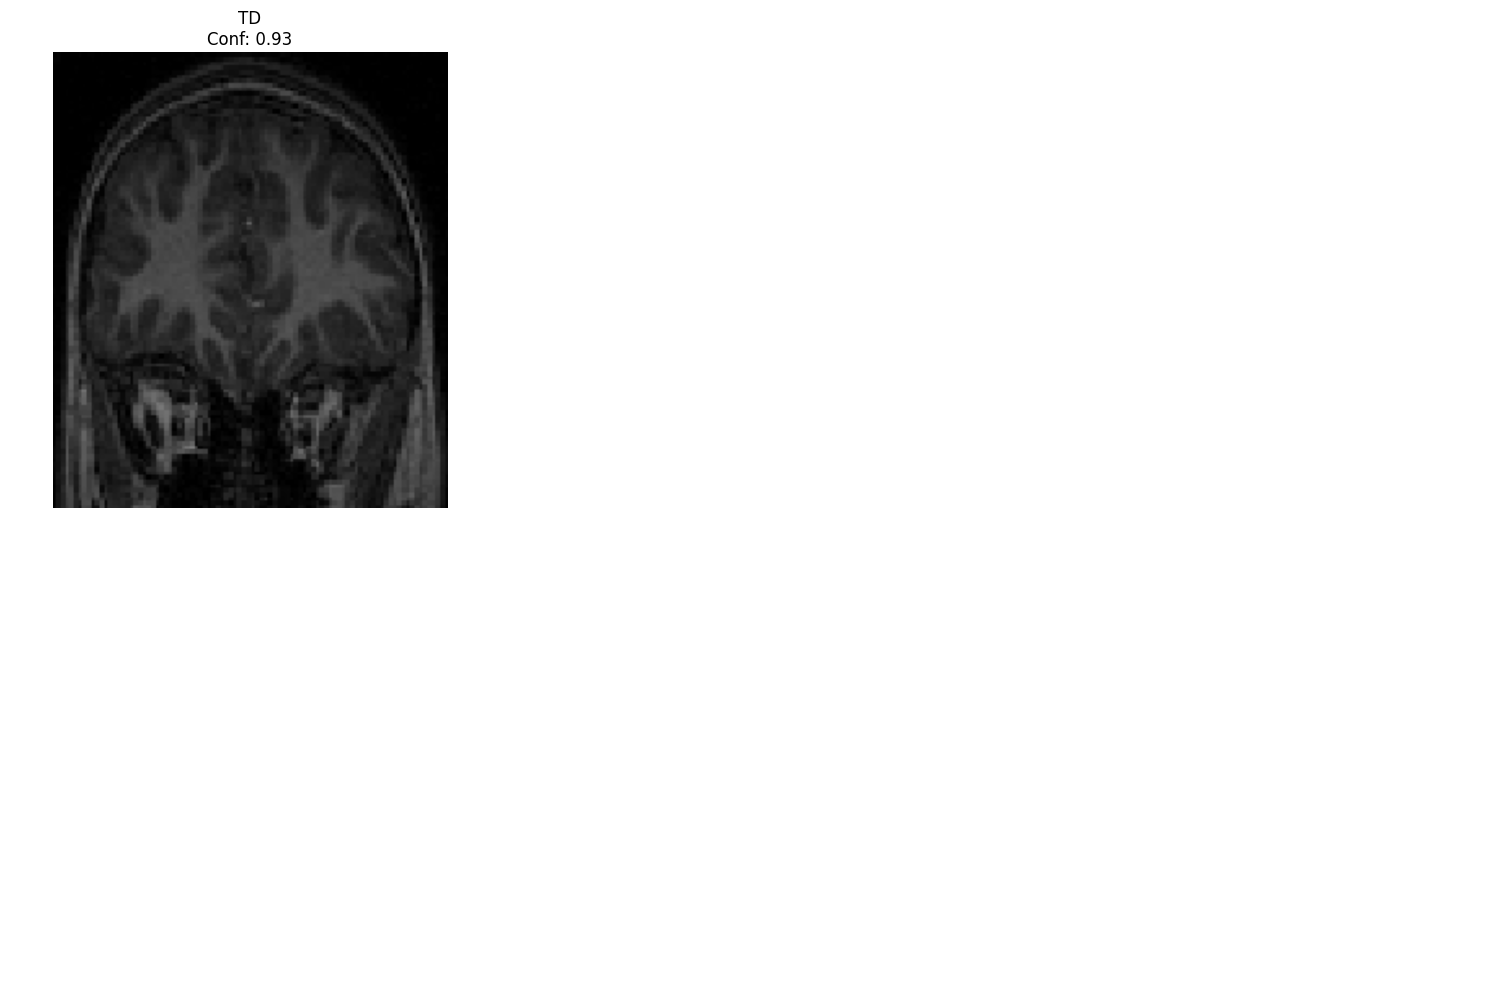

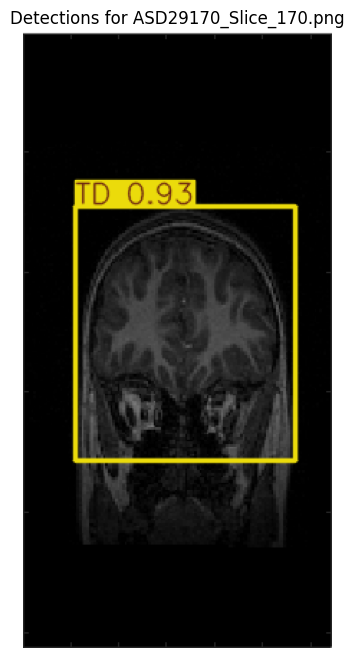


image 1/1 /content/drive/MyDrive/For_Testing/ASD29170__Slice_60.png: 512x640 1 TD, 70.0ms
Speed: 3.3ms preprocess, 70.0ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)

Processing ASD29170__Slice_60.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.953
  Bounding Box: [np.int64(107), np.int64(102), np.int64(499), np.int64(340)]
  Area: 93296 pixels
  ROI Shape: (238, 392, 3)
  Mean Intensity: 33.16
  Std Intensity: 25.55


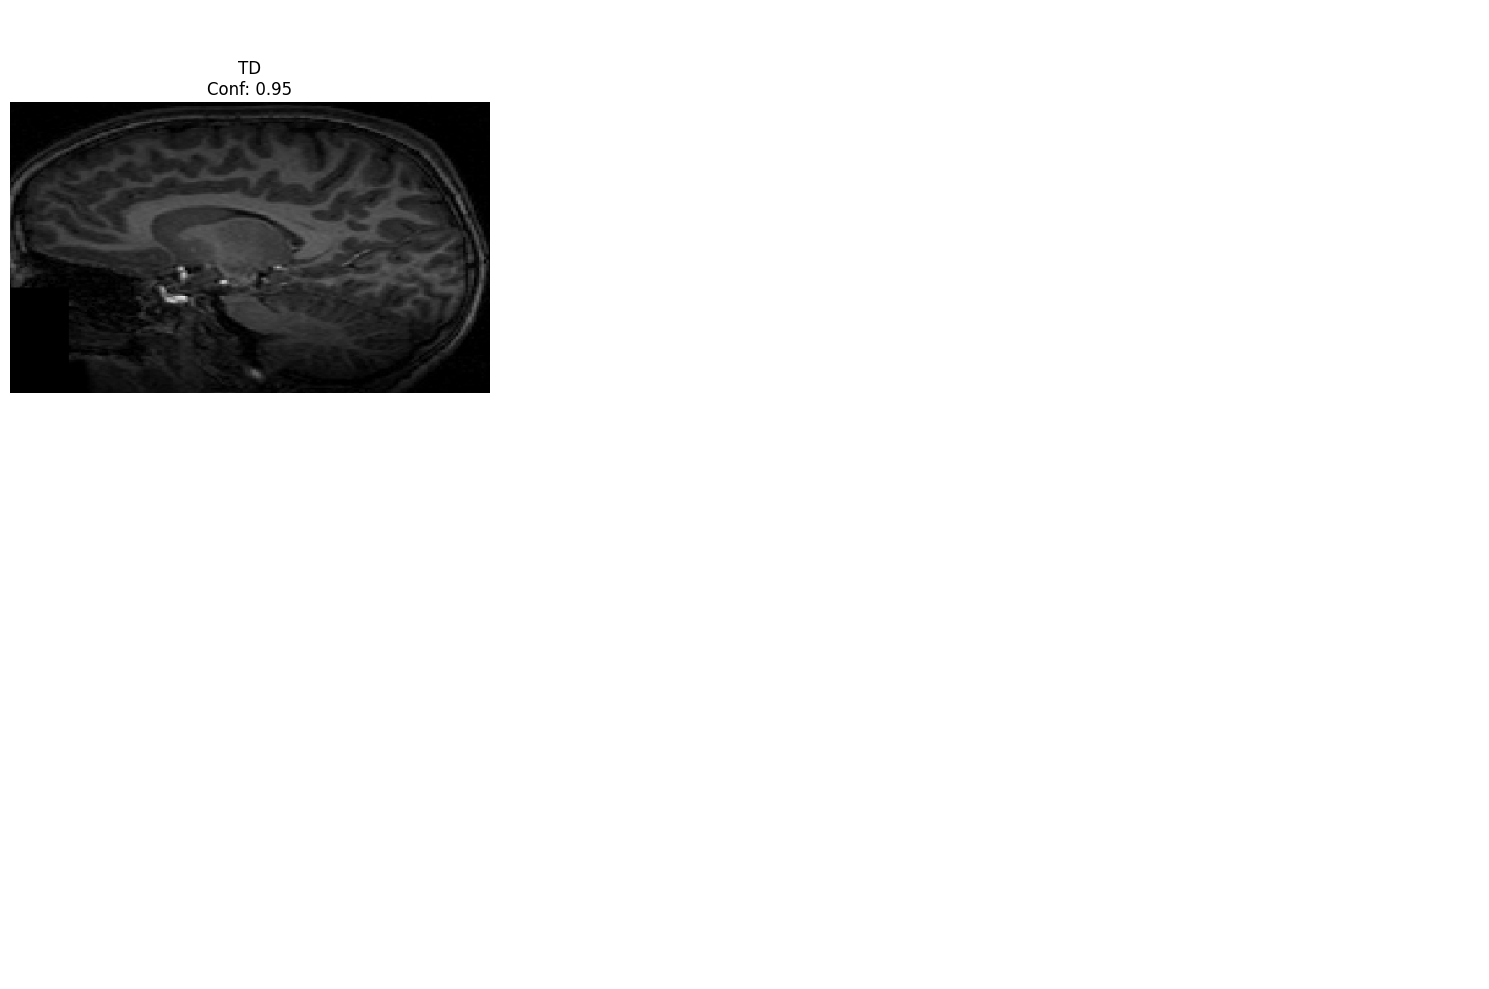

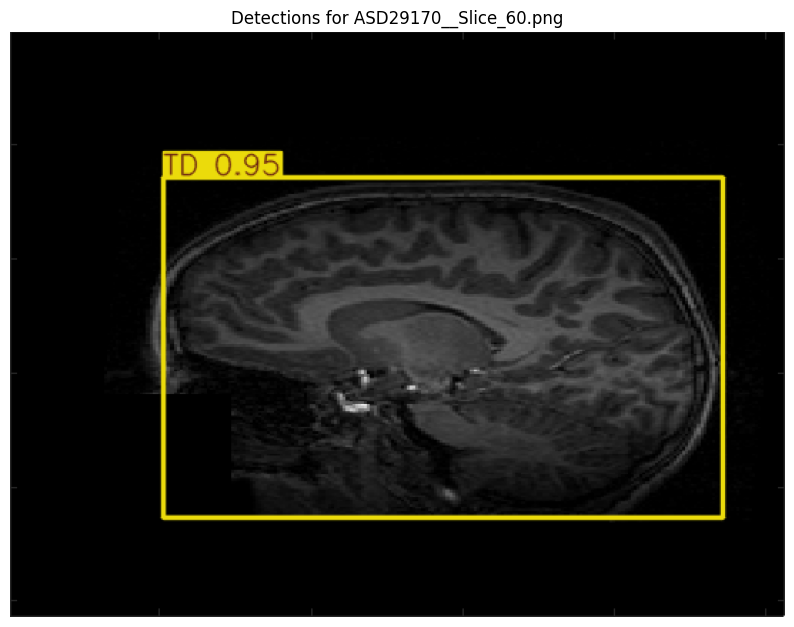


image 1/1 /content/drive/MyDrive/For_Testing/ASD29170_Slice_108.png: 640x256 1 TD, 72.2ms
Speed: 1.6ms preprocess, 72.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 256)

Processing ASD29170_Slice_108.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.642
  Bounding Box: [np.int64(16), np.int64(146), np.int64(154), np.int64(395)]
  Area: 34362 pixels
  ROI Shape: (249, 138, 3)
  Mean Intensity: 39.86
  Std Intensity: 26.90


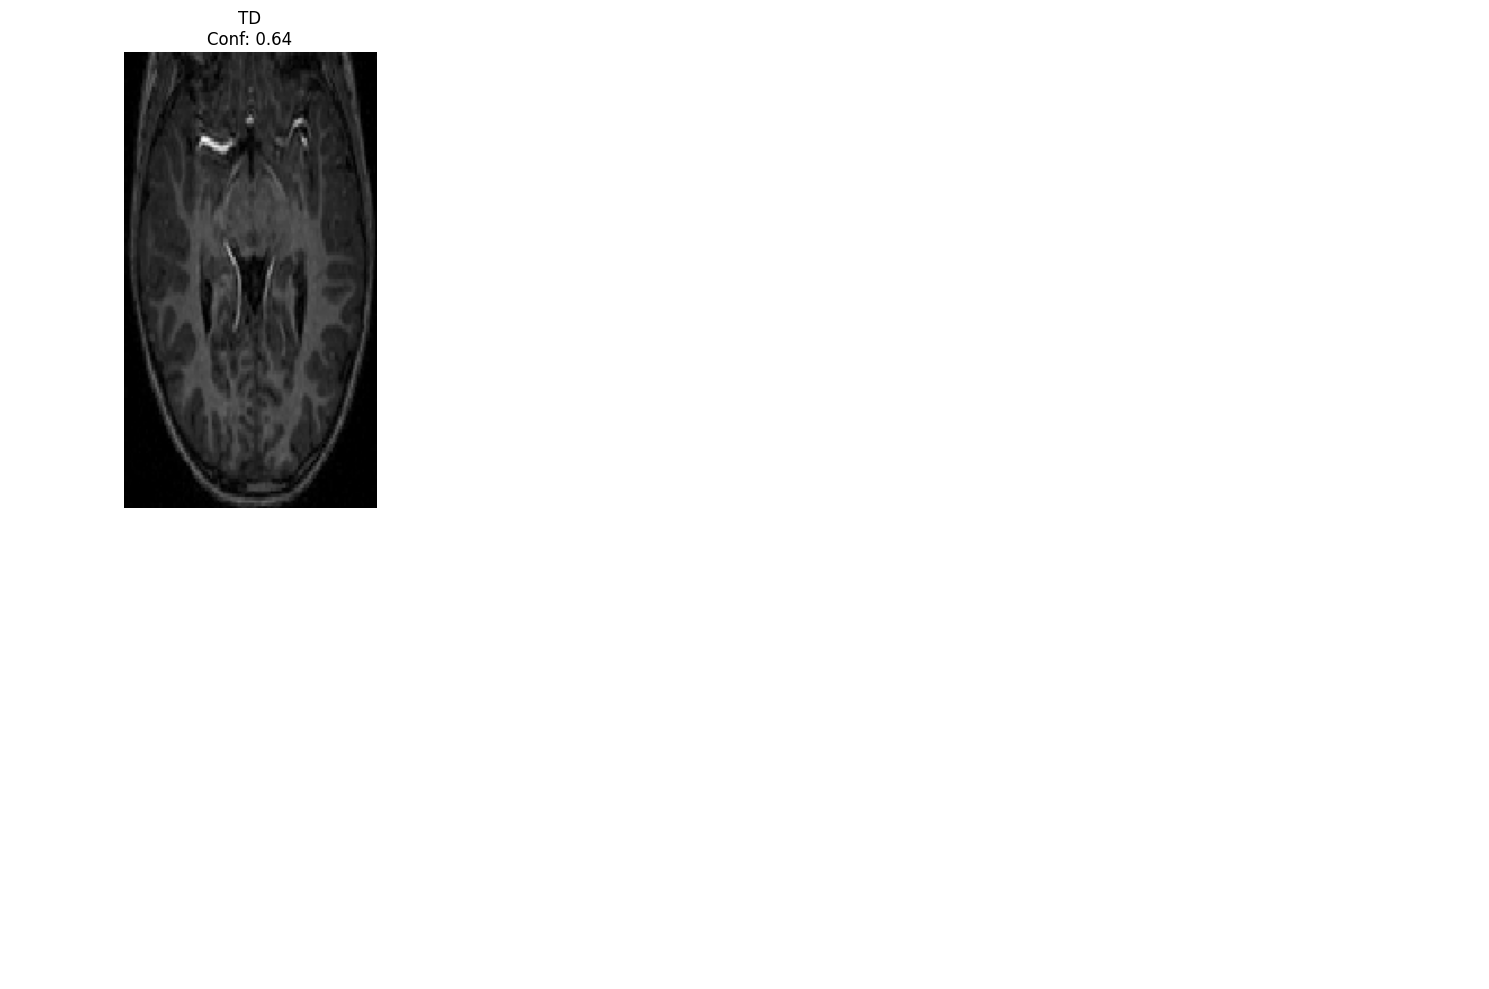

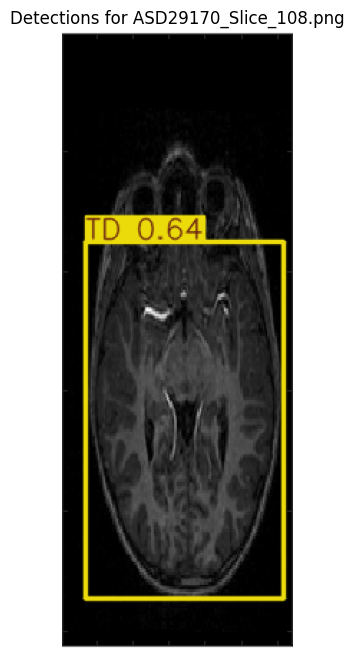


image 1/1 /content/drive/MyDrive/For_Testing/TD29238_Slice_163.png: 640x352 1 TD, 23.1ms
Speed: 2.7ms preprocess, 23.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 352)

Processing TD29238_Slice_163.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.941
  Bounding Box: [np.int64(34), np.int64(145), np.int64(183), np.int64(321)]
  Area: 26224 pixels
  ROI Shape: (176, 149, 3)
  Mean Intensity: 26.88
  Std Intensity: 20.53


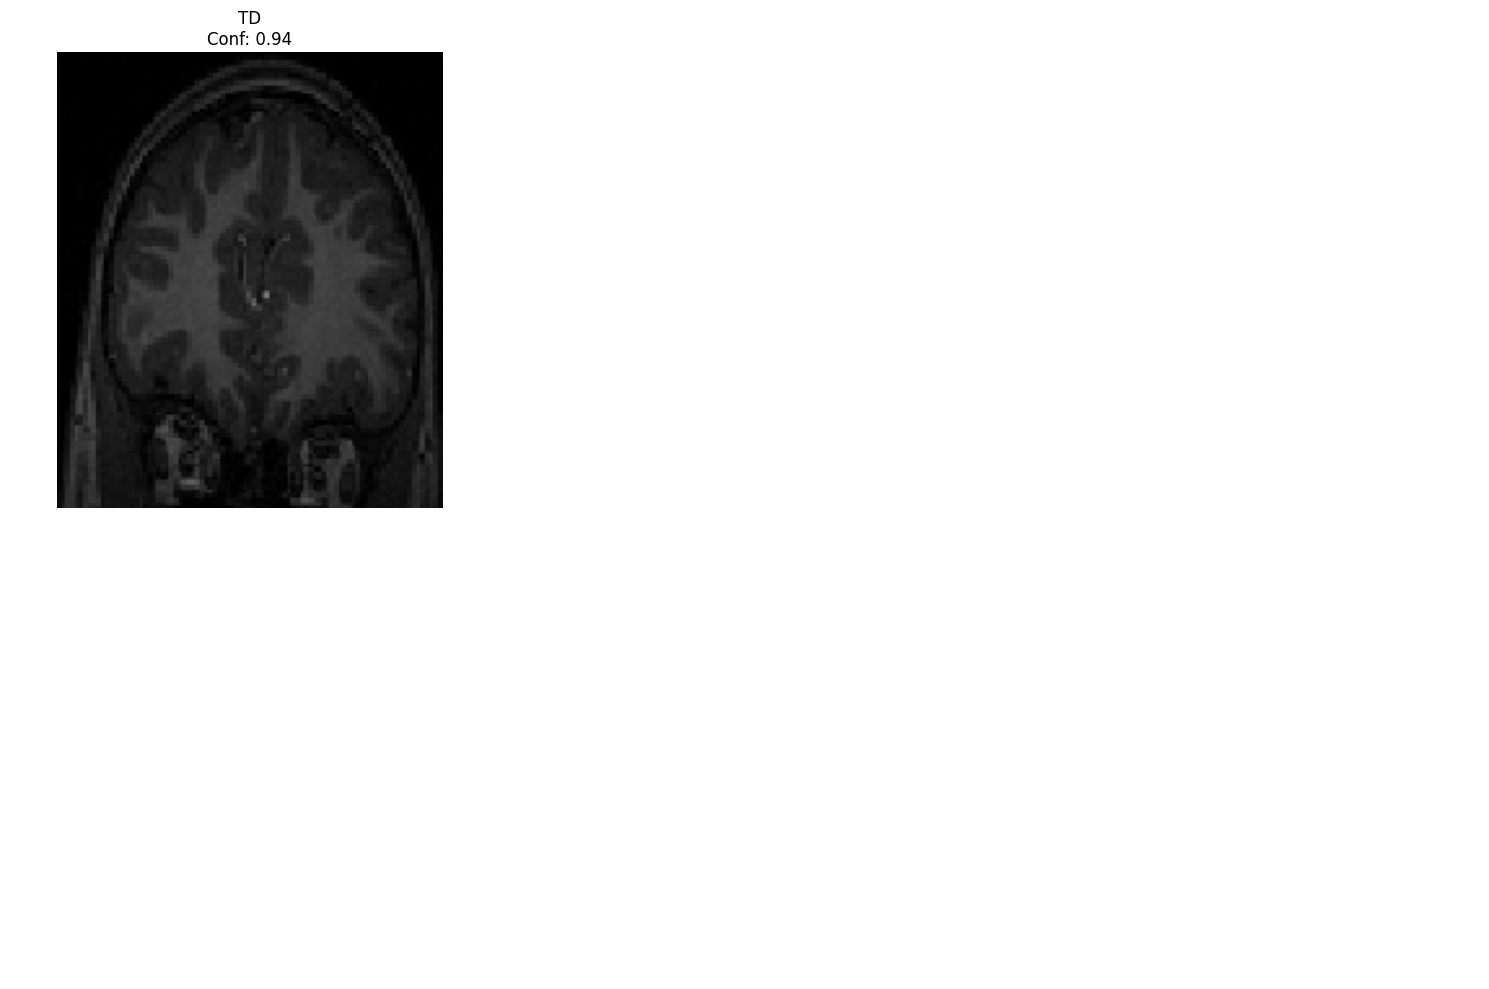

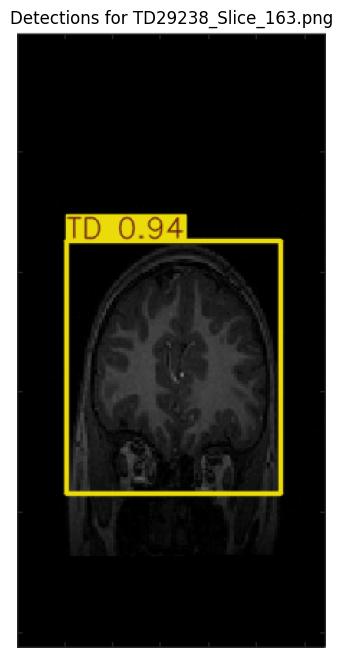


image 1/1 /content/drive/MyDrive/For_Testing/TD29238_Slice_45.png: 512x640 1 TD, 21.3ms
Speed: 3.3ms preprocess, 21.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)

Processing TD29238_Slice_45.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.933
  Bounding Box: [np.int64(124), np.int64(123), np.int64(476), np.int64(347)]
  Area: 78848 pixels
  ROI Shape: (224, 352, 3)
  Mean Intensity: 26.78
  Std Intensity: 22.02


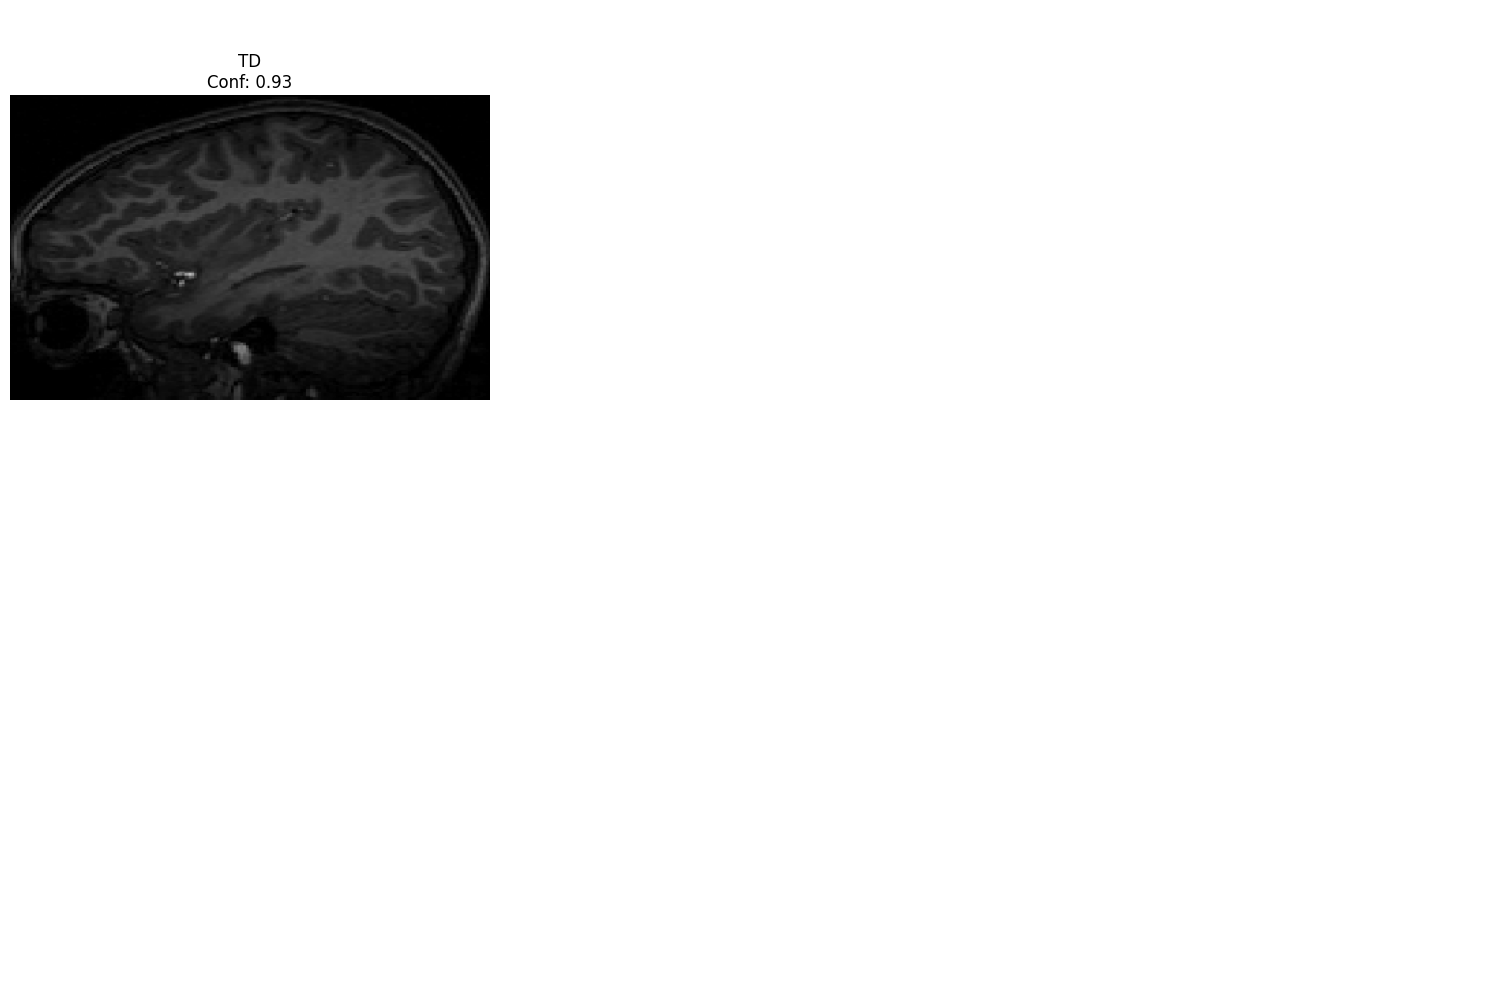

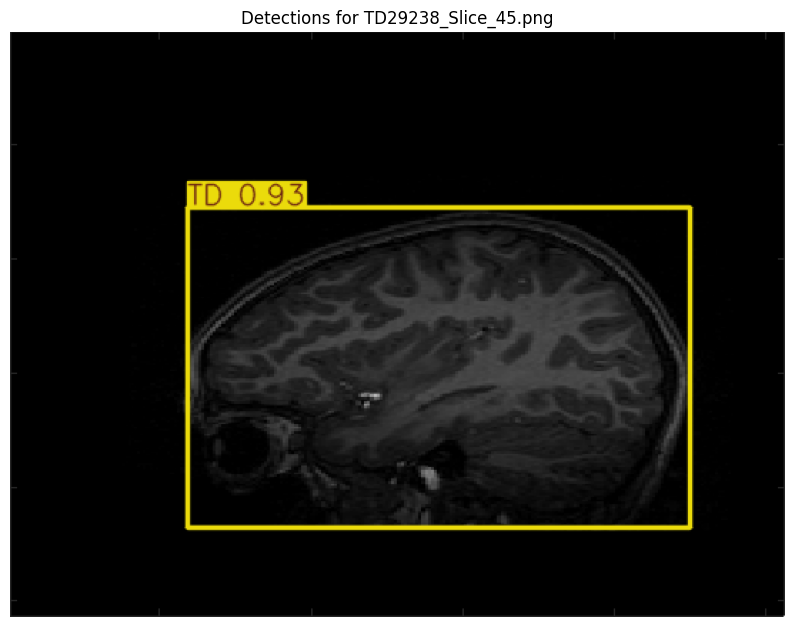


image 1/1 /content/drive/MyDrive/For_Testing/TD29238_Slice_94.png: 640x256 1 ASD, 23.1ms
Speed: 2.5ms preprocess, 23.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 256)

Processing TD29238_Slice_94.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: ASD
  Confidence: 0.910
  Bounding Box: [np.int64(16), np.int64(83), np.int64(153), np.int64(390)]
  Area: 42059 pixels
  ROI Shape: (307, 137, 3)
  Mean Intensity: 27.76
  Std Intensity: 21.90


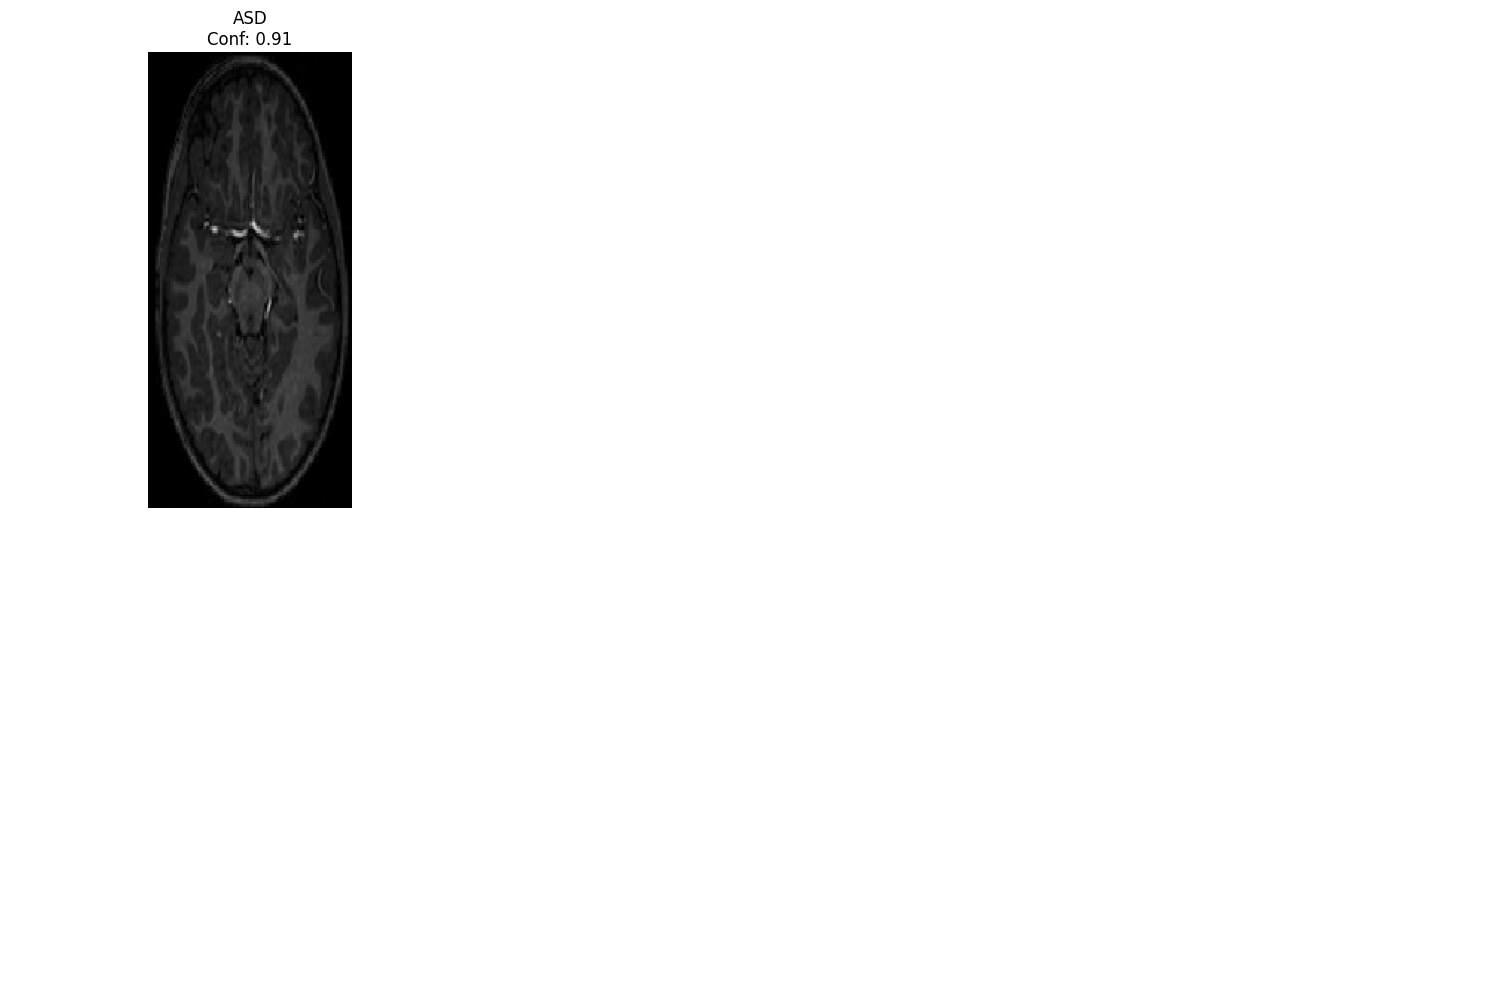

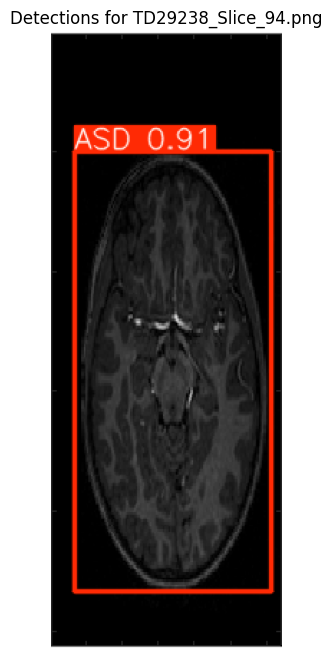


image 1/1 /content/drive/MyDrive/For_Testing/ASD29224_Slice_114.png: 640x256 1 ASD, 21.5ms
Speed: 1.6ms preprocess, 21.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 256)

Processing ASD29224_Slice_114.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: ASD
  Confidence: 0.929
  Bounding Box: [np.int64(15), np.int64(135), np.int64(153), np.int64(375)]
  Area: 33120 pixels
  ROI Shape: (240, 138, 3)
  Mean Intensity: 28.27
  Std Intensity: 19.74


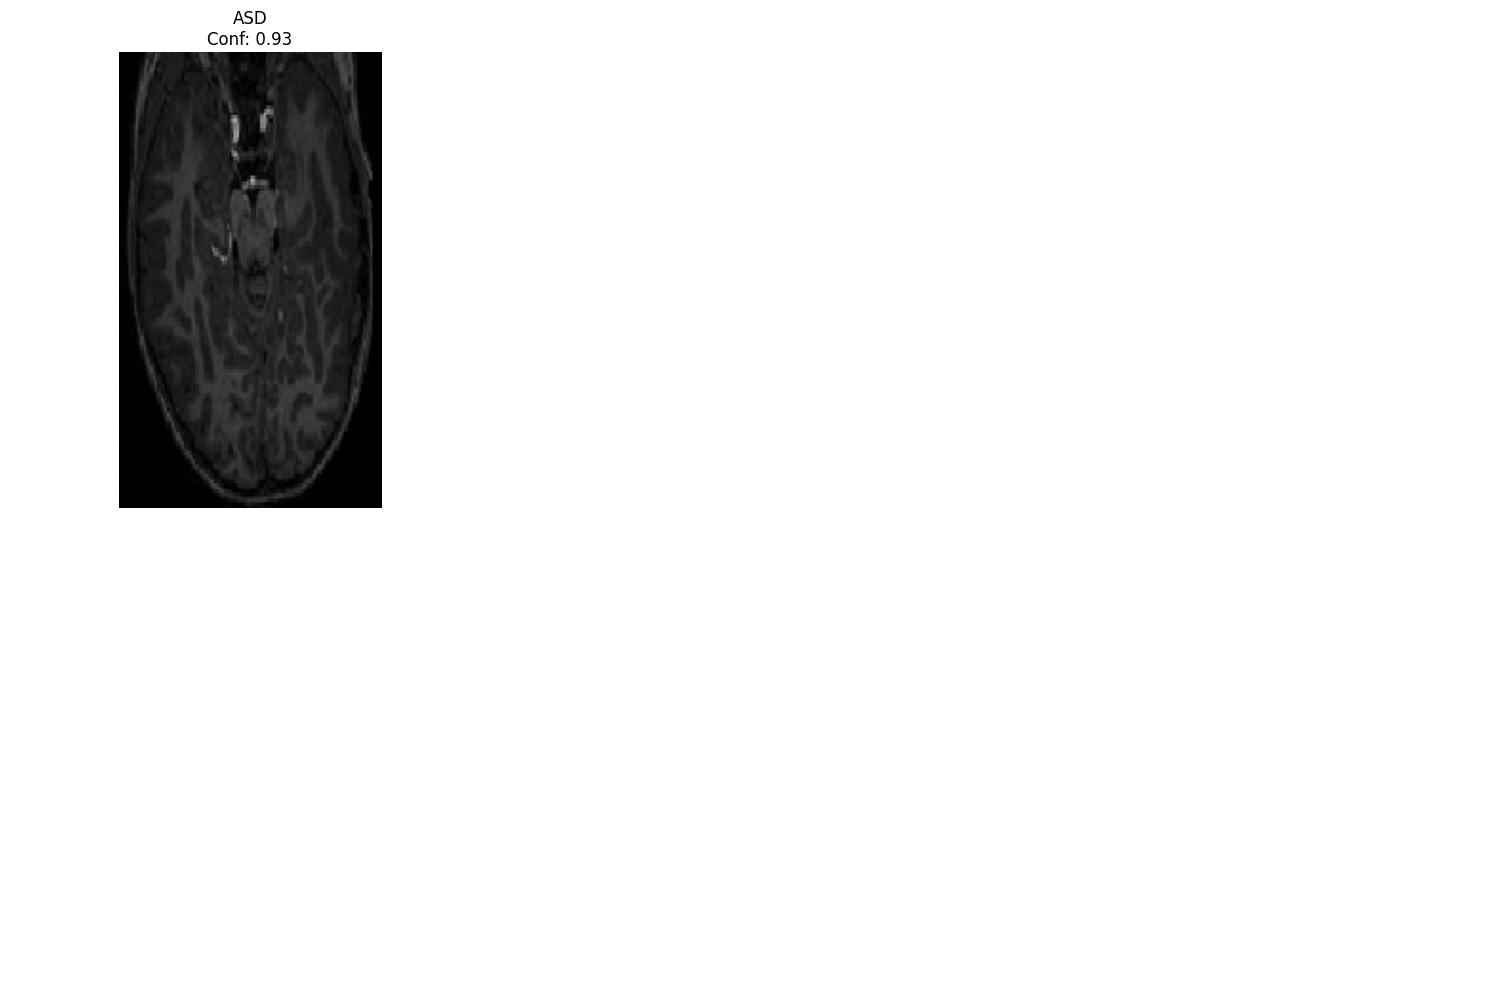

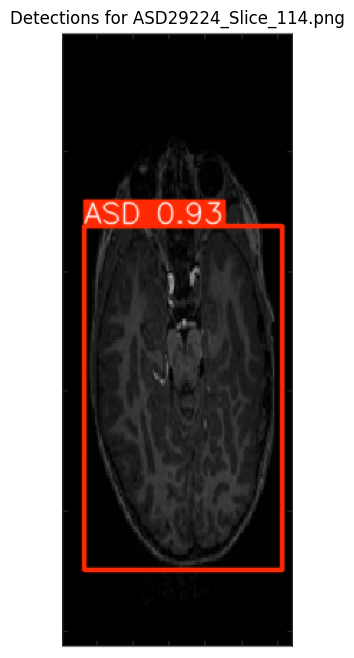


image 1/1 /content/drive/MyDrive/For_Testing/ASDSlice_55.png: 512x640 1 ASD, 21.9ms
Speed: 2.6ms preprocess, 21.9ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)

Processing ASDSlice_55.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: ASD
  Confidence: 0.941
  Bounding Box: [np.int64(103), np.int64(73), np.int64(471), np.int64(325)]
  Area: 92736 pixels
  ROI Shape: (252, 368, 3)
  Mean Intensity: 25.09
  Std Intensity: 20.46


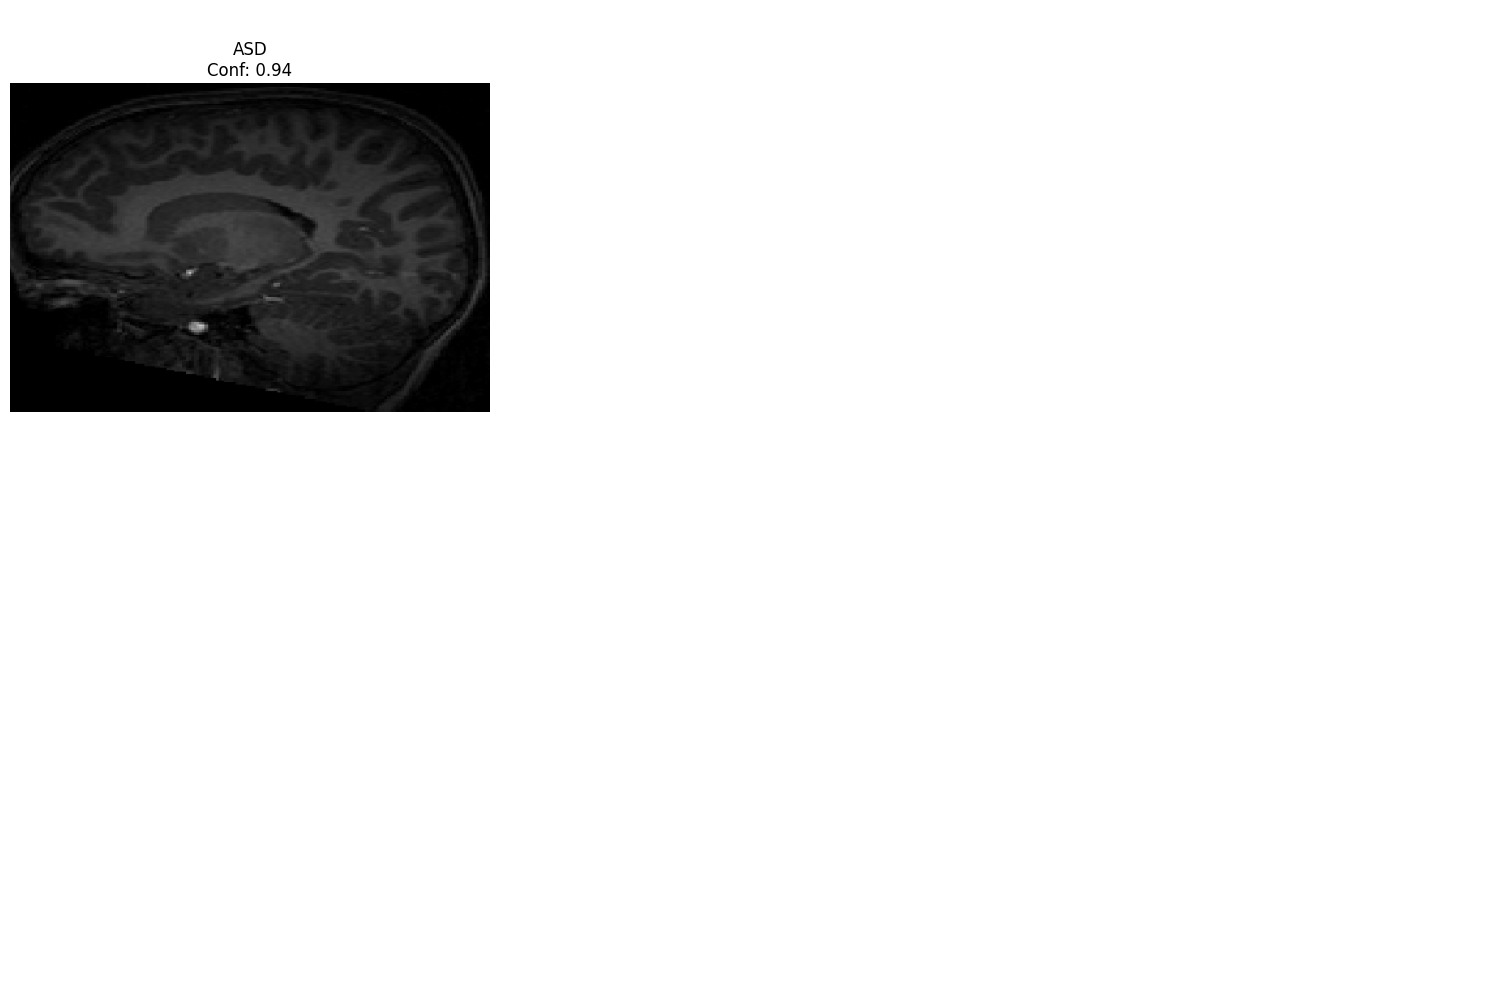

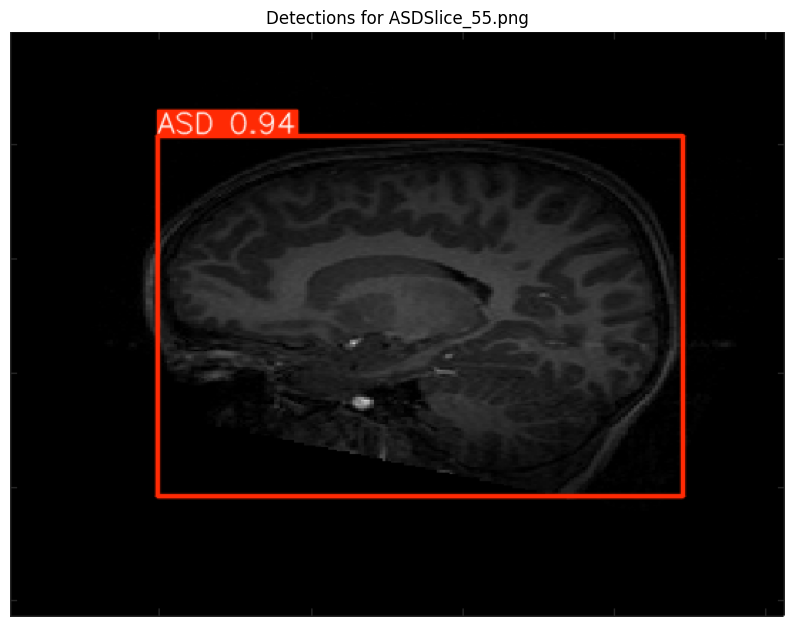


image 1/1 /content/drive/MyDrive/For_Testing/TDSlice_92.png: 640x352 1 ASD, 21.5ms
Speed: 1.9ms preprocess, 21.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 352)

Processing TDSlice_92.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: ASD
  Confidence: 0.918
  Bounding Box: [np.int64(15), np.int64(90), np.int64(190), np.int64(332)]
  Area: 42350 pixels
  ROI Shape: (242, 175, 3)
  Mean Intensity: 28.50
  Std Intensity: 21.26


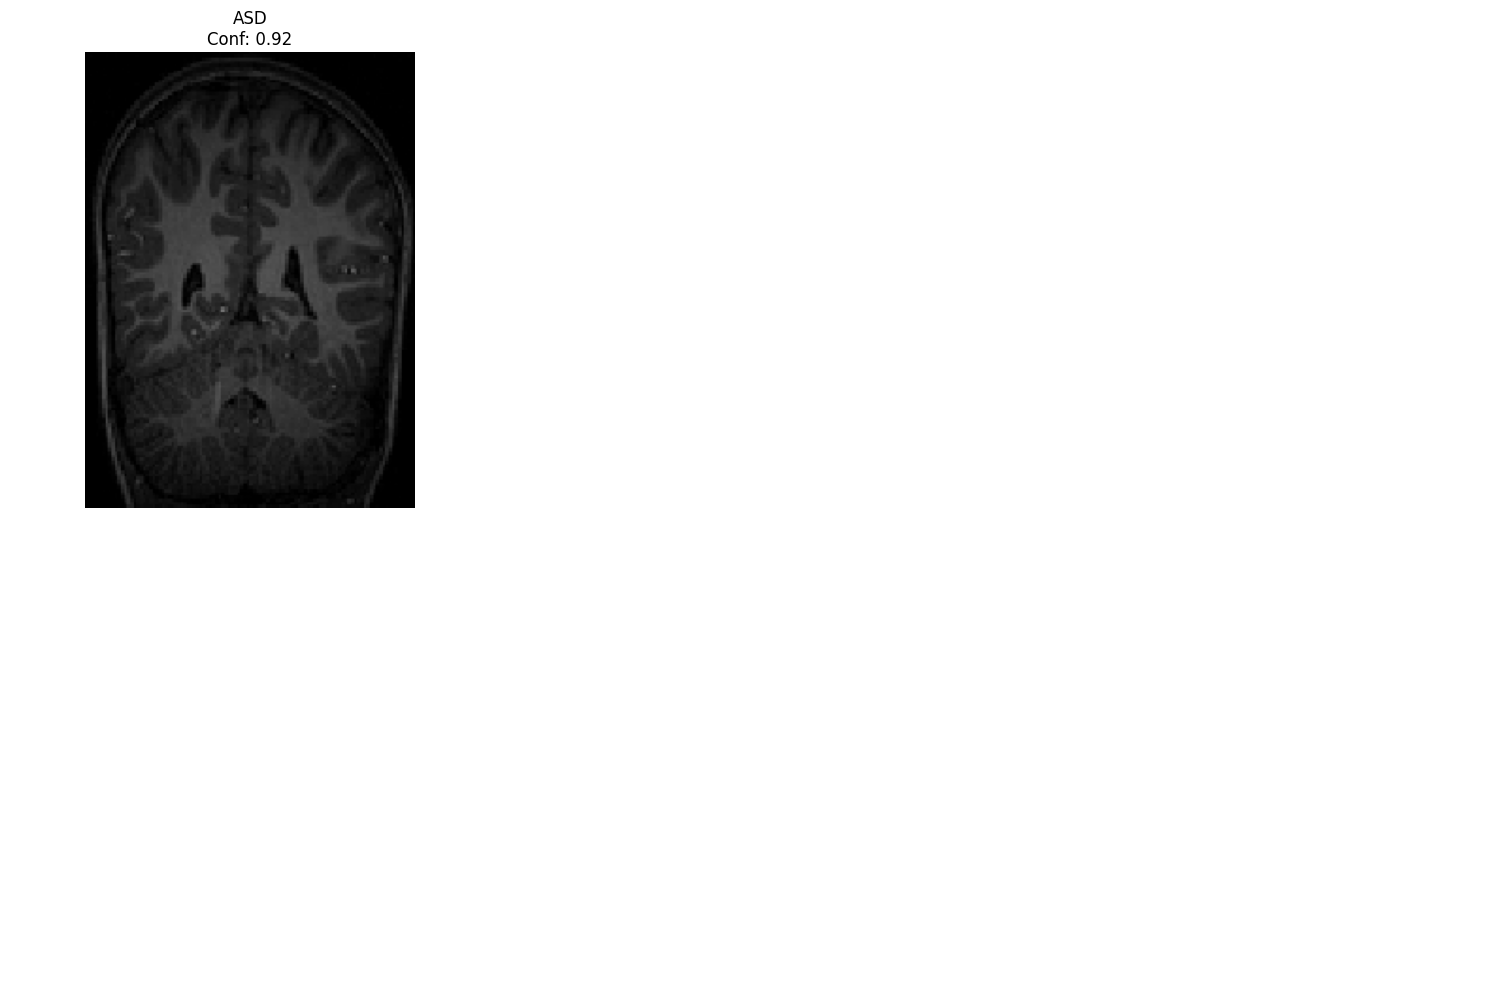

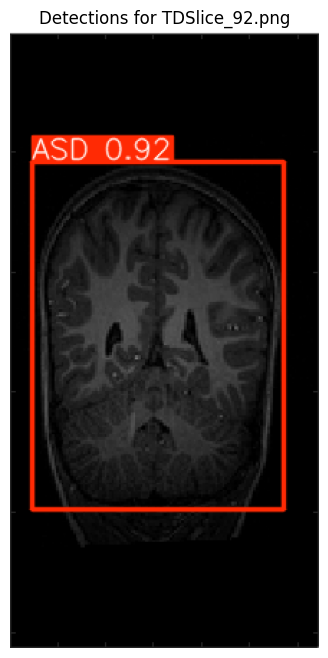

In [ ]:
from ultralytics import YOLO
# Example usage after training
def test_roi_extraction():
    """
    Test ROI extraction on validation images
    """
    # Load the trained model
    trained_model = YOLO('/content/drive/MyDrive/sMRI2_yolov11_training_results/weights/best.pt')

    # Get some validation images
    val_images_path = '/content/drive/MyDrive/For_Testing'

    # Create directory for ROI outputs
    roi_output_path = '/content/drive/MyDrive/MRI_yolov11_training_results/extracted_rois'
    os.makedirs(roi_output_path, exist_ok=True)

    # Process a few validation images
    image_files = [f for f in os.listdir(val_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_file in image_files[:9]:  # Process first 5 images
        img_path = os.path.join(val_images_path, img_file)

        # Load image
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Run inference
        results = trained_model(img_path)[0]

        if len(results.boxes) > 0:
            print(f"\nProcessing {img_file}:")
            print(f"Found {len(results.boxes)} detections")

            # Extract ROIs
            rois = extract_roi_from_yolo_results(results, image_rgb, roi_output_path)

            # Analyze ROIs
            analyze_roi_features(rois)

            # Visualize ROIs
            visualize_rois(rois)

            # Save annotated image
            annotated_img = results.plot()
            plt.figure(figsize=(10, 8))
            plt.imshow(annotated_img)
            plt.title(f"Detections for {img_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"No detections found in {img_file}")

# Run ROI extraction after training
print("Starting ROI extraction analysis...")
test_roi_extraction()

In [ ]:

# Additional analysis functions
def compare_class_rois(rois):
    """
    Compare ROIs between different classes (ASD vs TD)
    """
    asd_rois = [roi for roi in rois if roi['class_name'] == 'ASD']
    td_rois = [roi for roi in rois if roi['class_name'] == 'TD']

    print(f"\nClass Comparison:")
    print(f"ASD ROIs: {len(asd_rois)}")
    print(f"TD ROIs: {len(td_rois)}")

    if asd_rois:
        asd_confidences = [roi['confidence'] for roi in asd_rois]
        print(f"ASD - Avg Confidence: {np.mean(asd_confidences):.3f}")

    if td_rois:
        td_confidences = [roi['confidence'] for roi in td_rois]
        print(f"TD - Avg Confidence: {np.mean(td_confidences):.3f}")

In [ ]:
def extract_roi_gradcam(model, image_path, target_class=None):
    """
    Extract attention maps using Grad-CAM for better understanding
    Note: This is a simplified version - full implementation would require
    hooking into model layers
    """
    # This is a placeholder for Grad-CAM implementation
    # You would need to implement proper gradient computation
    print("Grad-CAM implementation would go here")
    print("This requires hooking into model's intermediate layers")


image 1/1 /content/drive/MyDrive/For_Testing/ASD29170_Slice_170.png: 640x352 1 TD, 20.2ms
Speed: 2.5ms preprocess, 20.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 352)

Processing ASD29170_Slice_170.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.870
  Bounding Box: [np.int64(37), np.int64(117), np.int64(185), np.int64(262)]
  Area: 21460 pixels
  ROI Shape: (145, 148, 3)
  Mean Intensity: 33.74
  Std Intensity: 24.08


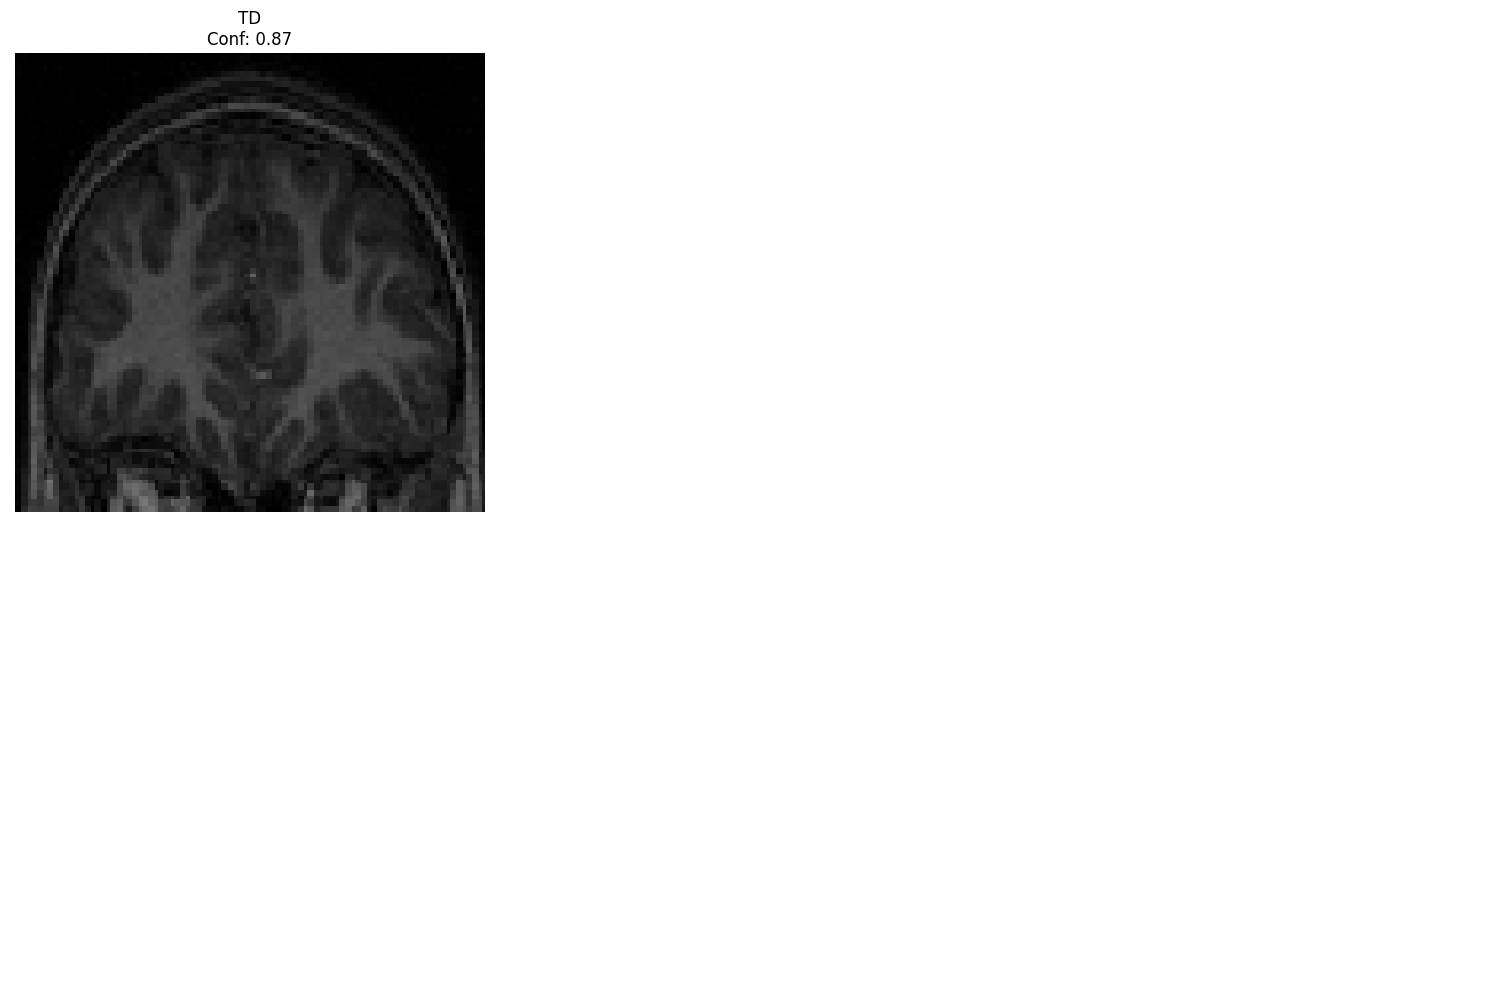

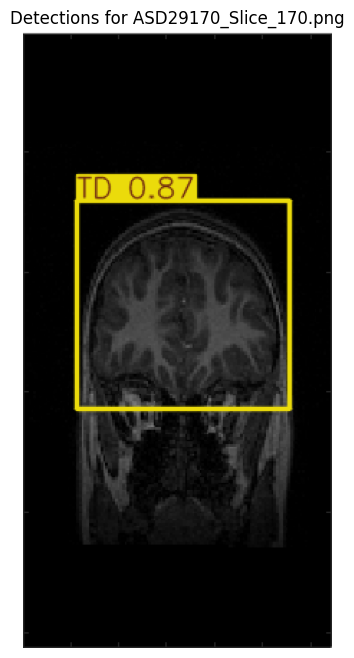


image 1/1 /content/drive/MyDrive/For_Testing/ASD29170__Slice_60.png: 512x640 1 TD, 21.1ms
Speed: 2.4ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)

Processing ASD29170__Slice_60.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.945
  Bounding Box: [np.int64(93), np.int64(99), np.int64(499), np.int64(344)]
  Area: 99470 pixels
  ROI Shape: (245, 406, 3)
  Mean Intensity: 31.56
  Std Intensity: 25.90


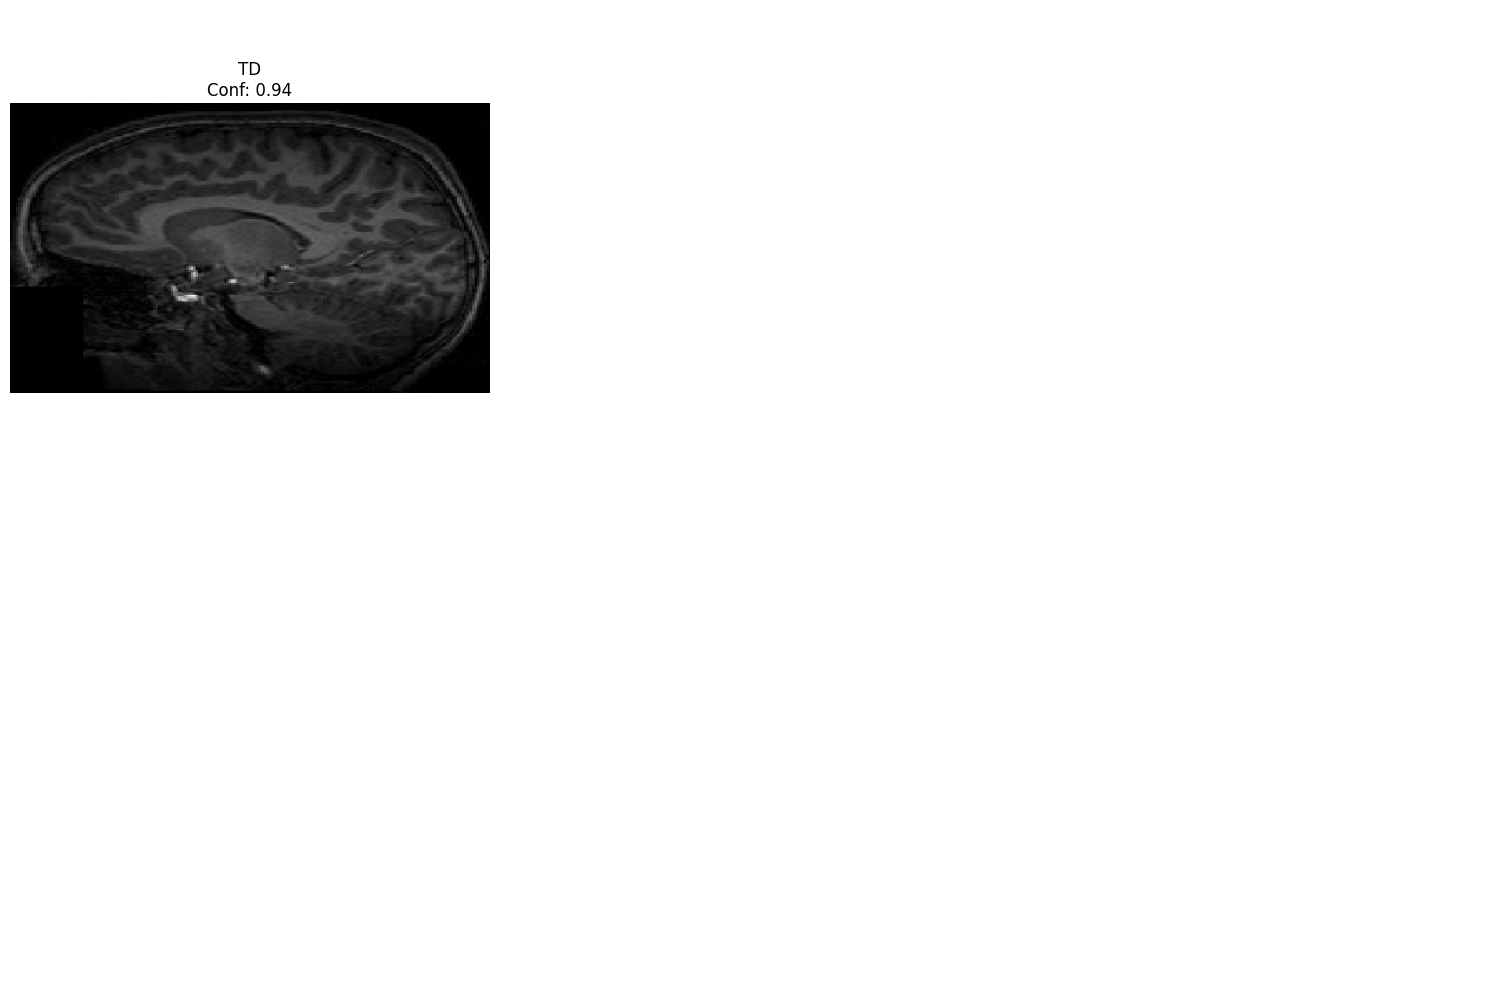

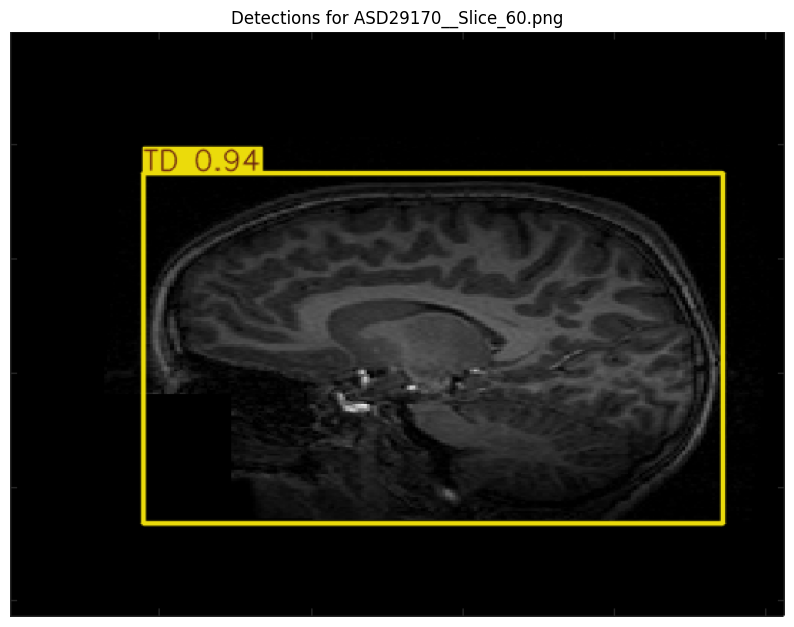


image 1/1 /content/drive/MyDrive/For_Testing/ASD29170_Slice_108.png: 640x256 1 ASD, 1 TD, 22.0ms
Speed: 1.5ms preprocess, 22.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 256)

Processing ASD29170_Slice_108.png:
Found 2 detections
=== ROI Analysis ===

ROI 1:
  Class: ASD
  Confidence: 0.485
  Bounding Box: [np.int64(14), np.int64(62), np.int64(156), np.int64(395)]
  Area: 47286 pixels
  ROI Shape: (333, 142, 3)
  Mean Intensity: 32.50
  Std Intensity: 27.66

ROI 2:
  Class: TD
  Confidence: 0.350
  Bounding Box: [np.int64(14), np.int64(62), np.int64(156), np.int64(395)]
  Area: 47286 pixels
  ROI Shape: (333, 142, 3)
  Mean Intensity: 32.50
  Std Intensity: 27.66


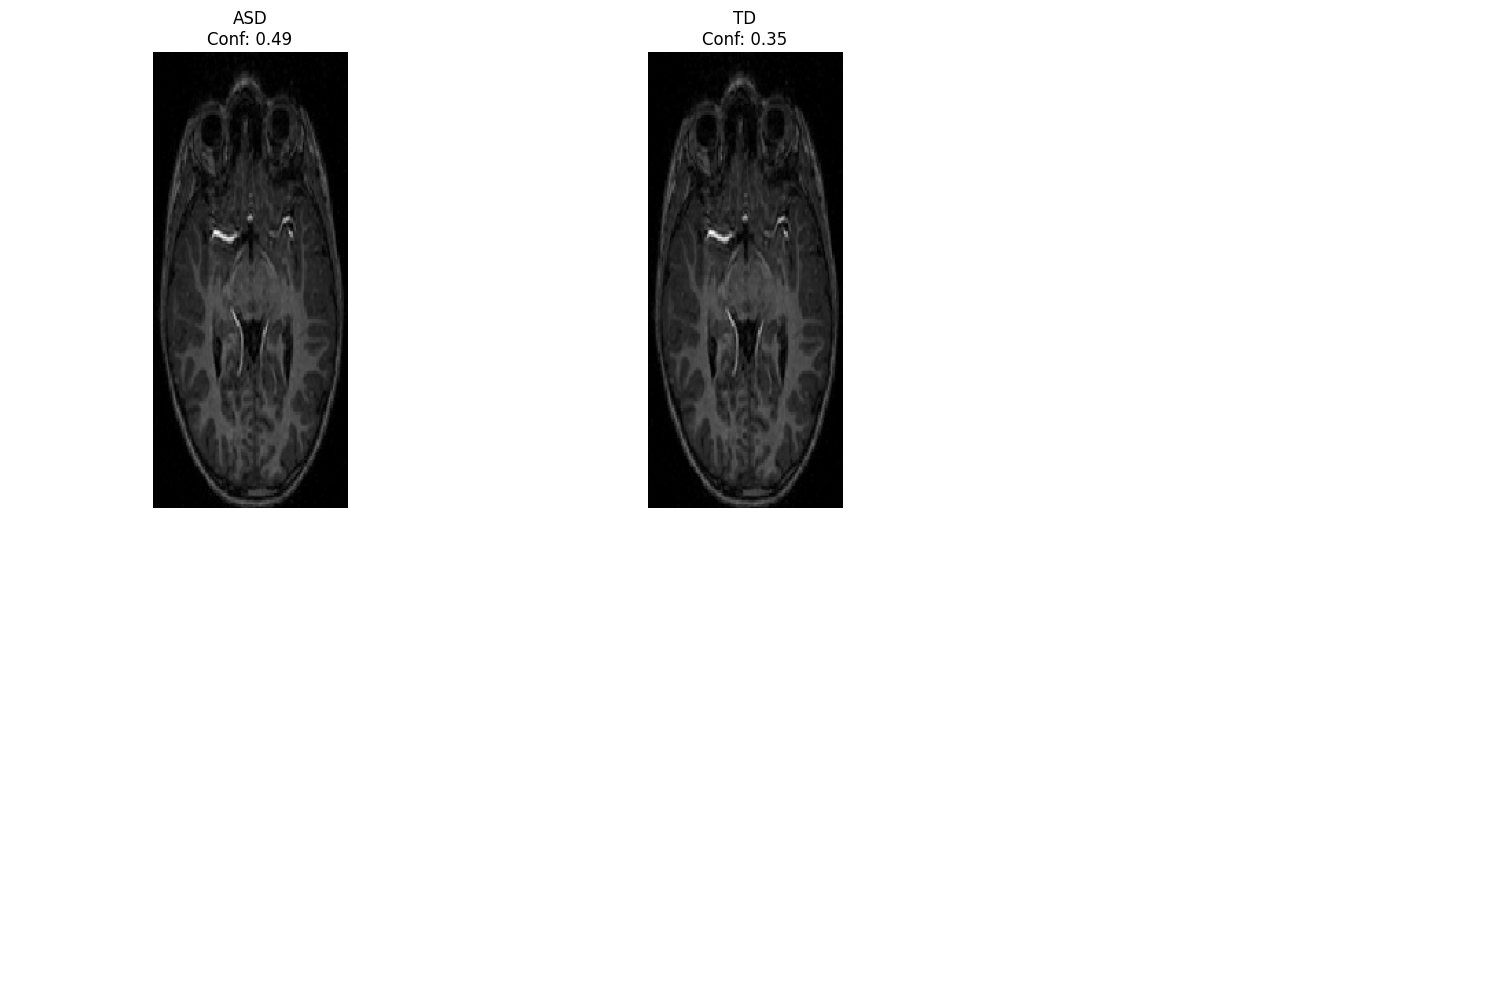

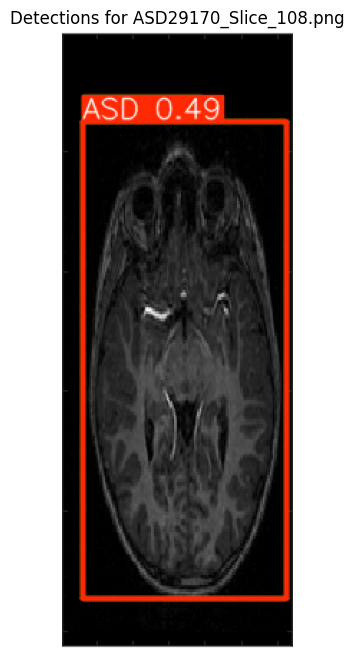


image 1/1 /content/drive/MyDrive/For_Testing/TD29238_Slice_163.png: 640x352 1 TD, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 352)

Processing TD29238_Slice_163.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: TD
  Confidence: 0.891
  Bounding Box: [np.int64(32), np.int64(143), np.int64(184), np.int64(340)]
  Area: 29944 pixels
  ROI Shape: (197, 152, 3)
  Mean Intensity: 24.83
  Std Intensity: 20.40


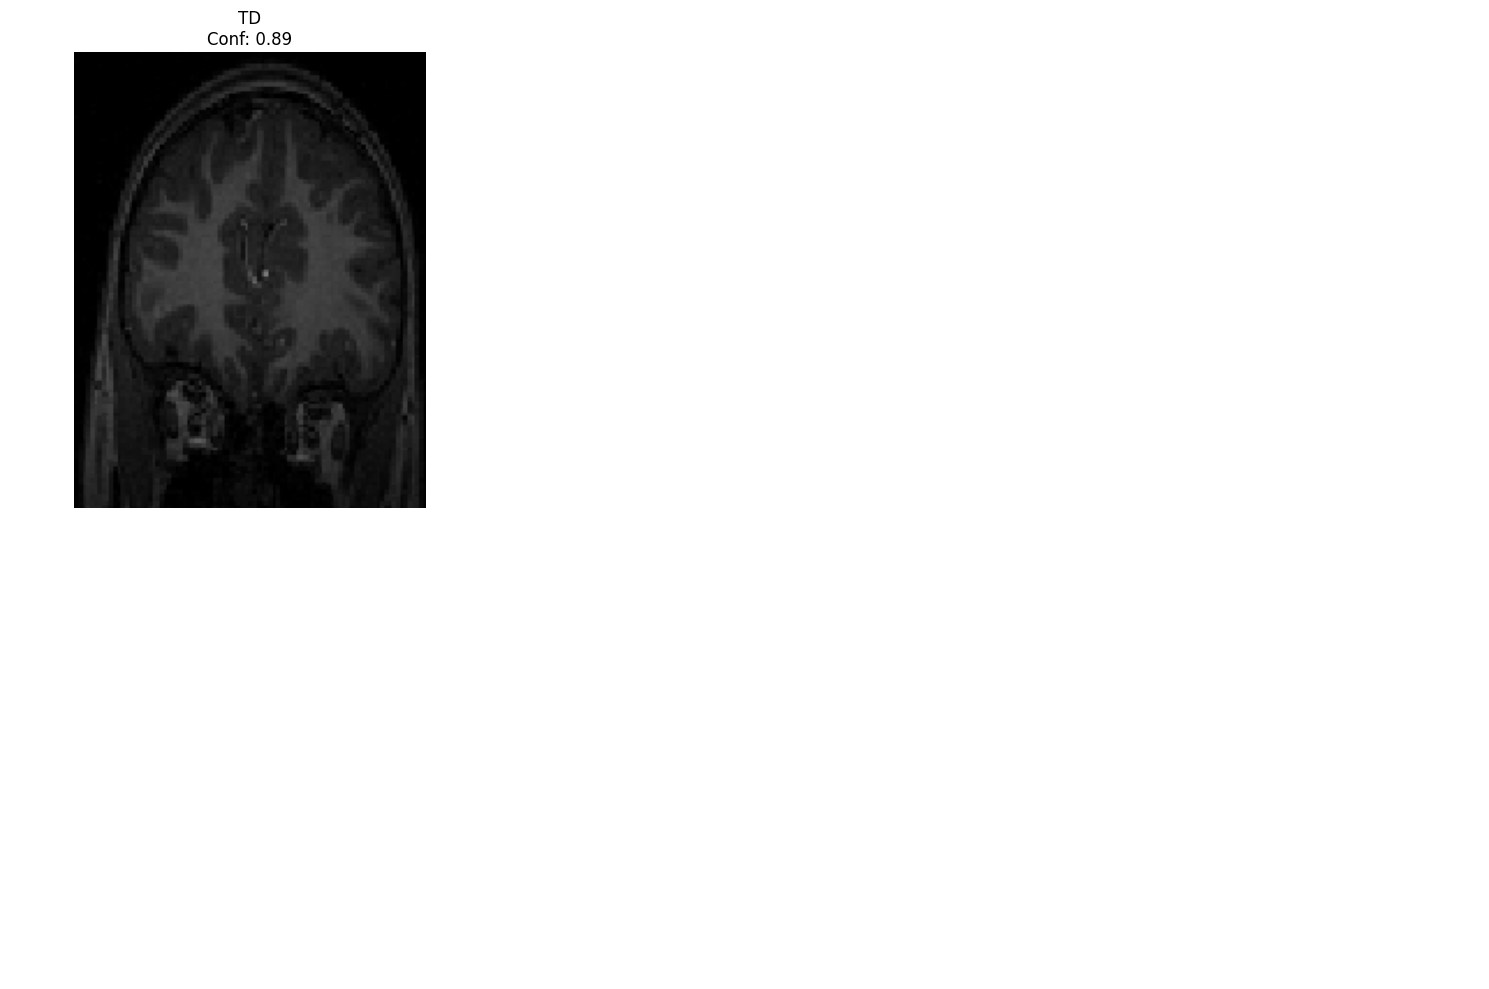

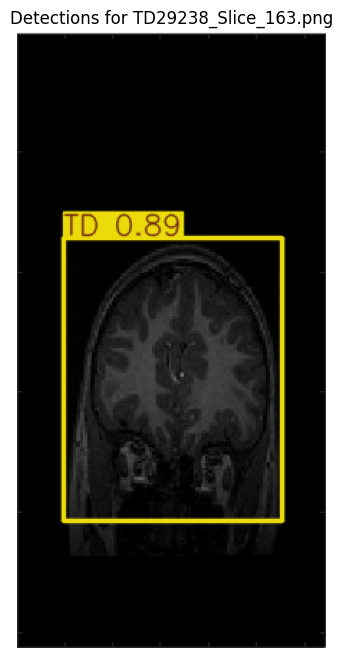


image 1/1 /content/drive/MyDrive/For_Testing/TD29238_Slice_45.png: 512x640 1 ASD, 20.6ms
Speed: 2.5ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)

Processing TD29238_Slice_45.png:
Found 1 detections
=== ROI Analysis ===

ROI 1:
  Class: ASD
  Confidence: 0.877
  Bounding Box: [np.int64(116), np.int64(121), np.int64(479), np.int64(350)]
  Area: 83127 pixels
  ROI Shape: (229, 363, 3)
  Mean Intensity: 25.51
  Std Intensity: 22.17


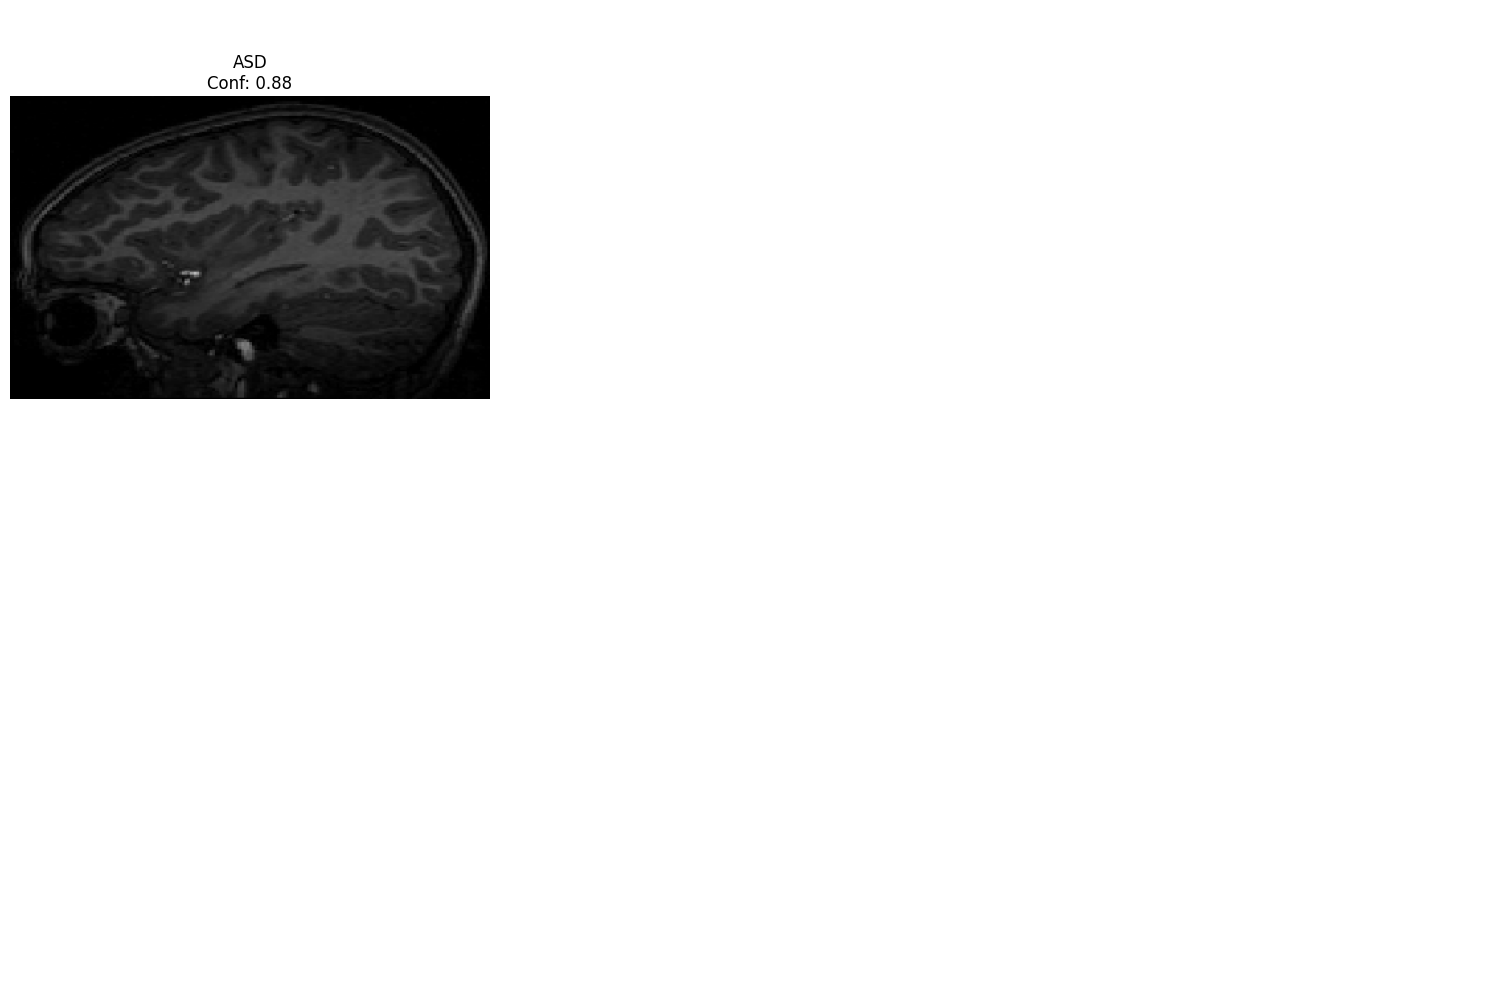

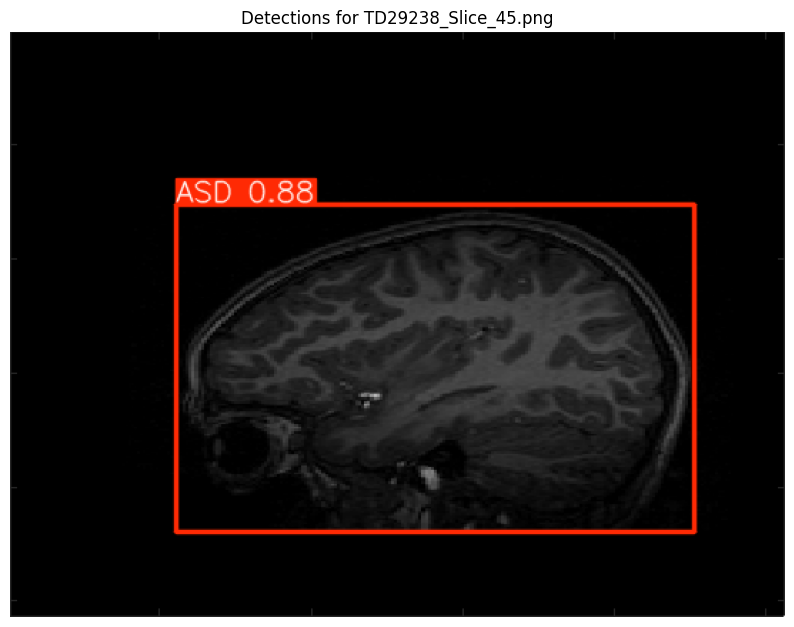

In [ ]:
test_roi_extraction()

In [7]:
import torch
import torch.nn as nn
from ultralytics.utils.metrics import ConfusionMatrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from pathlib import Path

In [8]:
class DICEEvaluator:
    """
    DICE (Directed Sparsification) Evaluation Matrix for YOLO model
    Particularly useful for medical imaging segmentation and classification tasks
    """

    def __init__(self, num_classes=2, class_names=['ASD', 'TD']):
        self.num_classes = num_classes
        self.class_names = class_names
        self.reset()

    def reset(self):
        """Reset all metrics"""
        self.confusion_matrix = np.zeros((self.num_classes, self.num_classes))
        self.dice_scores = []
        self.iou_scores = []

    def dice_coefficient(self, pred, target, smooth=1e-6):
        """
        Calculate DICE coefficient
        Args:
            pred: predicted mask/labels
            target: ground truth mask/labels
            smooth: smoothing factor to avoid division by zero
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        dice = (2.0 * intersection + smooth) / (np.sum(pred) + np.sum(target) + smooth)

        return dice

    def iou_score(self, pred, target, smooth=1e-6):
        """
        Calculate Intersection over Union (IoU) score
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        union = np.sum(pred) + np.sum(target) - intersection
        iou = (intersection + smooth) / (union + smooth)

        return iou

    def directed_sparsification_score(self, pred, target, sparsity_levels=[0.1, 0.3, 0.5, 0.7, 0.9]):
        """
        Calculate Directed Sparsification score
        This measures how well the model maintains performance with increasing sparsity
        """
        scores = []

        for sparsity in sparsity_levels:
            # Apply sparsification by zeroing out lowest confidence predictions
            pred_sparse = pred.copy()
            threshold = np.percentile(pred_sparse, sparsity * 100)
            pred_sparse[pred_sparse < threshold] = 0

            # Calculate DICE score for sparsified prediction
            dice_sparse = self.dice_coefficient(pred_sparse, target)
            scores.append(dice_sparse)

        return np.array(scores), sparsity_levels

    def update(self, predictions, targets):
        """
        Update metrics with new predictions and targets
        """
        for pred, target in zip(predictions, targets):
            # Convert to numpy if tensor
            if torch.is_tensor(pred):
                pred = pred.cpu().numpy()
            if torch.is_tensor(target):
                target = target.cpu().numpy()

            # Ensure predictions and targets are in valid range
            pred = np.clip(pred, 0, self.num_classes - 1)
            target = np.clip(target, 0, self.num_classes - 1)

            # Calculate DICE and IoU scores for binary masks
            if pred.ndim > 1 and target.ndim > 1:
                # For mask-based evaluation
                dice = self.dice_coefficient(pred, target)
                iou = self.iou_score(pred, target)

                self.dice_scores.append(dice)
                self.iou_scores.append(iou)

                # Convert masks to class predictions
                pred_class = int(np.mean(pred) > 0.5)  # Simple threshold for binary
                target_class = int(np.mean(target) > 0.5)
            else:
                # For class-based evaluation
                pred_class = int(pred) if np.isscalar(pred) else int(np.argmax(pred))
                target_class = int(target) if np.isscalar(target) else int(np.argmax(target))

                # For class predictions, use perfect dice/iou
                self.dice_scores.append(1.0 if pred_class == target_class else 0.0)
                self.iou_scores.append(1.0 if pred_class == target_class else 0.0)

            # Ensure class indices are within bounds
            pred_class = max(0, min(pred_class, self.num_classes - 1))
            target_class = max(0, min(target_class, self.num_classes - 1))

            self.confusion_matrix[target_class, pred_class] += 1

    def compute_metrics(self):
        """
        Compute final metrics
        """
        metrics = {
            'mean_dice': np.mean(self.dice_scores),
            'std_dice': np.std(self.dice_scores),
            'mean_iou': np.mean(self.iou_scores),
            'std_iou': np.std(self.iou_scores),
            'confusion_matrix': self.confusion_matrix
        }

        # Calculate per-class metrics
        for i, class_name in enumerate(self.class_names):
            tp = self.confusion_matrix[i, i]
            fp = np.sum(self.confusion_matrix[:, i]) - tp
            fn = np.sum(self.confusion_matrix[i, :]) - tp

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics[f'{class_name}_precision'] = precision
            metrics[f'{class_name}_recall'] = recall
            metrics[f'{class_name}_f1'] = f1

        return metrics

    def plot_confusion_matrix(self, normalize=True):
        """
        Plot confusion matrix
        """
        cm = self.confusion_matrix
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Normalized Confusion Matrix'
            fmt = '.2f'
        else:
            title = 'Confusion Matrix'
            fmt = 'd'

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                   xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def plot_dice_distribution(self):
        """
        Plot DICE score distribution
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.dice_scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(np.mean(self.dice_scores), color='red', linestyle='--',
                   label=f'Mean: {np.mean(self.dice_scores):.3f}')
        plt.xlabel('DICE Score')
        plt.ylabel('Frequency')
        plt.title('Distribution of DICE Scores')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [9]:
def evaluate_yolo_with_dice(model, data_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Evaluate YOLO model with DICE metrics
    """
    # Initialize DICE evaluator
    dice_evaluator = DICEEvaluator(num_classes=2, class_names=['ASD', 'TD'])

    # Get validation results from YOLO
    results = model.val(data=data_path, device=device)

    # Process validation images for DICE calculation
    val_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/test/images')
    labels_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/test/labels')

    predictions = []
    targets = []

    print(f"Processing validation images from: {val_dir}")

    # Get all image files
    image_files = list(val_dir.glob('*.jpg')) + list(val_dir.glob('*.png')) + list(val_dir.glob('*.jpeg'))

    if not image_files:
        print("No image files found in validation directory!")
        return dice_evaluator, {}

    print(f"Found {len(image_files)} validation images")

    for img_path in image_files[:600]:  # Limit to first 50 images to avoid memory issues
        try:
            # Run inference
            result = model.predict(str(img_path), conf=0.50, device=device, verbose=False)

            # Get corresponding label file
            label_path = labels_dir / f"{img_path.stem}.txt"

            # Initialize prediction and target as class labels (0 or 1)
            pred_class = 0  # Default to class 0 (ASD)
            target_class = 0  # Default to class 0 (ASD)

            # Extract prediction class
            if result[0].boxes is not None and len(result[0].boxes) > 0:
                # Get the class with highest confidence
                confidences = result[0].boxes.conf.cpu().numpy()
                classes = result[0].boxes.cls.cpu().numpy()

                if len(confidences) > 0:
                    best_idx = np.argmax(confidences)
                    pred_class = int(classes[best_idx])
                    # Ensure class is within bounds
                    pred_class = max(0, min(pred_class, 1))

            # Extract target class from label file
            if label_path.exists():
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    if lines:
                        # Get first annotation's class
                        target_class = int(lines[0].split()[0])
                        # Ensure class is within bounds
                        target_class = max(0, min(target_class, 1))

            predictions.append(pred_class)
            targets.append(target_class)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    if not predictions:
        print("No valid predictions found!")
        return dice_evaluator, {}

    print(f"Successfully processed {len(predictions)} images")
    print(f"Prediction distribution: {np.bincount(predictions)}")
    print(f"Target distribution: {np.bincount(targets)}")

    # Update DICE evaluator with predictions and targets
    dice_evaluator.update(predictions, targets)

    # Compute final metrics
    metrics = dice_evaluator.compute_metrics()

    return dice_evaluator, metrics

Evaluating model with DICE metrics...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 9.3±4.0 MB/s, size: 11.4 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/valid/labels.cache... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:14<00:00,  6.26it/s]


                   all       1405       1405      0.985      0.988      0.994      0.932
                   ASD        704        704      0.975      0.997      0.992      0.926
                    TD        701        701      0.994       0.98      0.995      0.938
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
Processing validation images from: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov11/test/images
Found 702 validation images
Successfully processed 600 images
Prediction distribution: [317 283]
Target distribution: [314 286]

DICE EVALUATION RESULTS
Mean DICE Score: 0.9917 ± 0.0909
Mean IoU Score: 0.9917 ± 0.0909

Per-class metrics:
ASD:
  Precision: 0.9874
  Recall: 0.9968
  F1-Score: 0.9921
TD:
  Precision: 0.9965
  Recall: 0.9860
  F1-Score: 0.9912


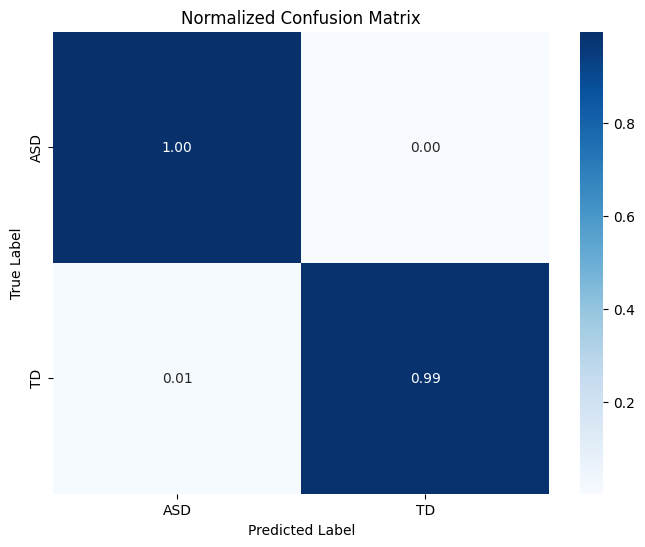

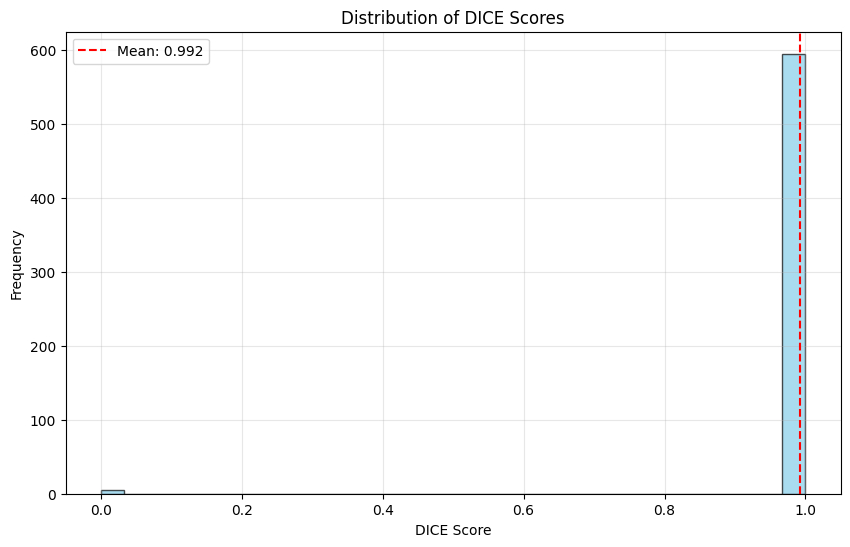

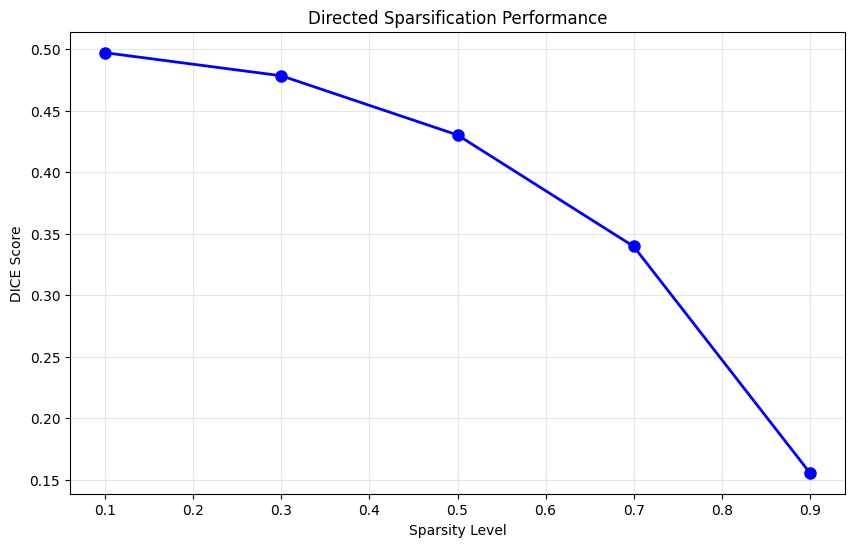

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl'

In [10]:
print("Evaluating model with DICE metrics...")
dice_evaluator, dice_metrics = evaluate_yolo_with_dice(model, "data.yaml")

# Print DICE metrics
print("\n" + "="*50)
print("DICE EVALUATION RESULTS")
print("="*50)
print(f"Mean DICE Score: {dice_metrics['mean_dice']:.4f} ± {dice_metrics['std_dice']:.4f}")
print(f"Mean IoU Score: {dice_metrics['mean_iou']:.4f} ± {dice_metrics['std_iou']:.4f}")
print("\nPer-class metrics:")
for class_name in ['ASD', 'TD']:
    print(f"{class_name}:")
    print(f"  Precision: {dice_metrics[f'{class_name}_precision']:.4f}")
    print(f"  Recall: {dice_metrics[f'{class_name}_recall']:.4f}")
    print(f"  F1-Score: {dice_metrics[f'{class_name}_f1']:.4f}")

# Plot results
dice_evaluator.plot_confusion_matrix()
dice_evaluator.plot_dice_distribution()

# Calculate and plot directed sparsification scores
sample_pred = np.random.rand(100, 100)  # Replace with actual prediction
sample_target = np.random.randint(0, 2, (100, 100))  # Replace with actual target

sparsity_scores, sparsity_levels = dice_evaluator.directed_sparsification_score(
    sample_pred, sample_target
)

plt.figure(figsize=(10, 6))
plt.plot(sparsity_levels, sparsity_scores, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Sparsity Level')
plt.ylabel('DICE Score')
plt.title('Directed Sparsification Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save results
dice_results = {
    'dice_scores': dice_evaluator.dice_scores,
    'iou_scores': dice_evaluator.iou_scores,
    'confusion_matrix': dice_evaluator.confusion_matrix,
    'metrics': dice_metrics
}

# Save to drive
import pickle
with open('/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl', 'wb') as f:
    pickle.dump(dice_results, f)

print("DICE evaluation results saved to drive!")